# Problem Statement

##### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

##### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

##### Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel: 

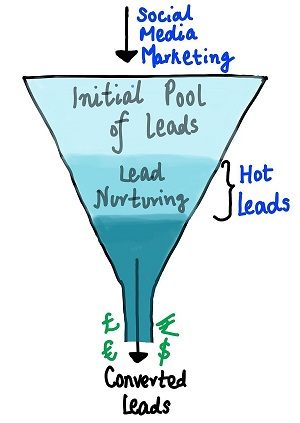

##### Lead Conversion Process - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.

##### In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

##### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
##### The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

##### The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data : 

#### We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

#### Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. 

### Goal of the Case Study

#### There are quite a few goals for this case study:

#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Importing the libraries and suppressing warnings

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Reading and understanding 

In [2]:
# Loading the data
df = pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the dataset
df.shape

(9240, 37)

Here we are dealing with data of dimensions 9240 rows and 37 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning 

In [7]:
#checking for duplicates
df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(9240, 37)

No duplicate values

We can see that the 'Select' value is present in multiple columns. This is because the customer didnt select any option from the list. 'Select' values can be considered as null values.

In [8]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Checking for null values in the different columns
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#Coverting the null values to percent
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# we will drop the columns having more than 70% NA values.
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [13]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# Dropping the "Prostect ID" and "Lead Number" columns as they contain all unique values 
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Now we will deal with the null values in the different columns one by one 

#### 'Country' column

In [15]:
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [16]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [17]:
# Country is India for most values so let's impute the same in missing values.
df['Country'] = df['Country'].replace(np.nan, 'India')

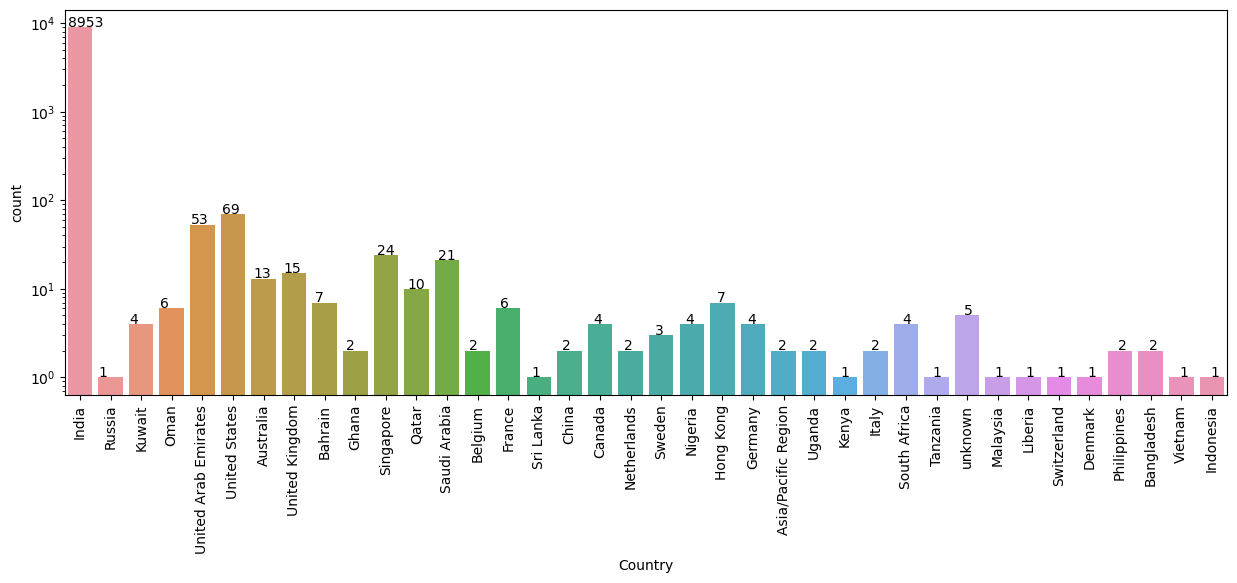

In [18]:
# Plotting the same
plt.figure(figsize = (15,5))
ax= sns.countplot(df['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [19]:
# Checking the missing values in the column
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [20]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

#### 'Specialization' Column

In [21]:
df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [22]:
df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,may not have any specialization or is a student. Hence we can make a category "Others" for missing values. 

In [23]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

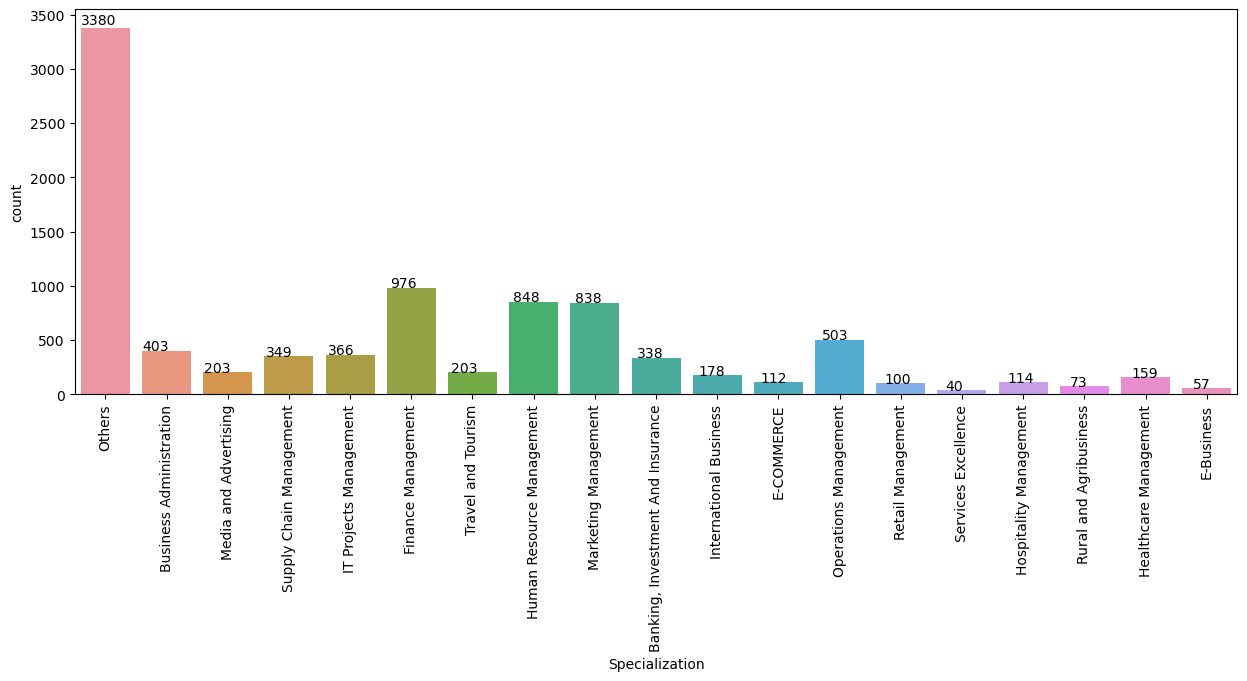

In [24]:
# Plotting the same
plt.figure(figsize = (15,5))
ax= sns.countplot(df['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [25]:
# Checking the dataset after the change
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

####  'What is your current occupation' Column

In [26]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [27]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We can see that more then 80% entries are of 'Unemployed' so we can impute 'Unemployed' in the missing values

In [28]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

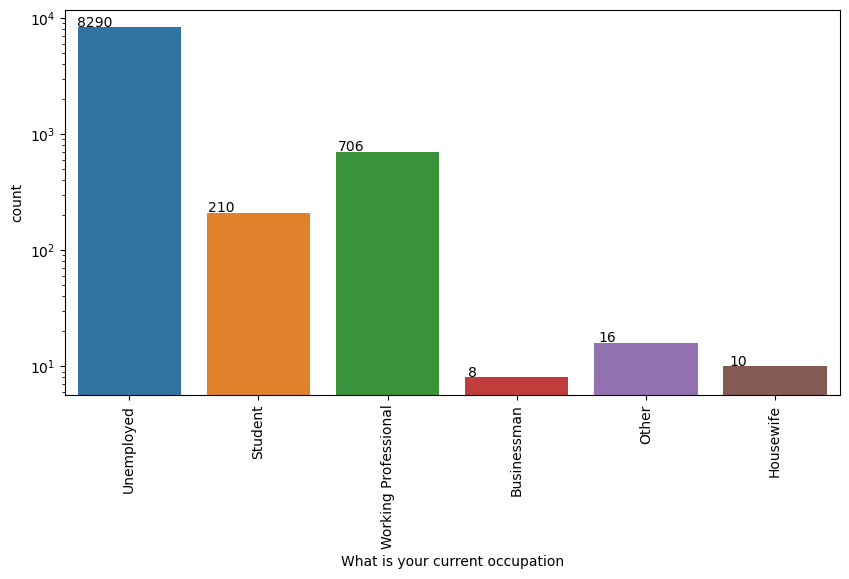

In [29]:
# plotting the same
plt.figure(figsize = (10,5))
ax= sns.countplot(df['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [30]:
# Checking the dataset after the change
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

####  'What matters most to you in choosing a course' column

In [31]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [32]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

The null values in this column can be imputed by 'Better Career Prospects'

In [33]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

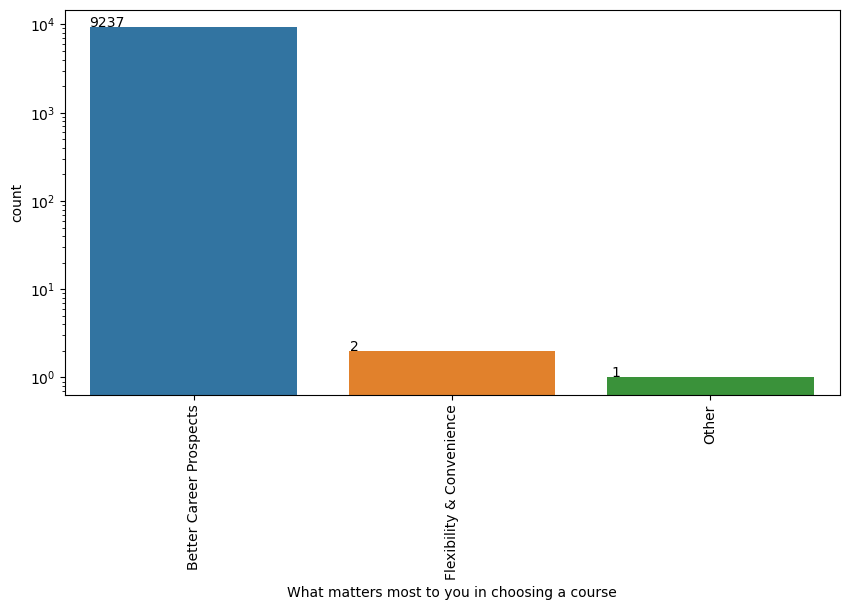

In [34]:
# plotting the same
plt.figure(figsize = (10,5))
ax= sns.countplot(df['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [35]:
# Checking the dataset after the change
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### 'City' column 

In [36]:
df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [37]:
df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

Around 57.8% of the data available is Mumbai so we can impute Mumbai in the missing values.

In [38]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

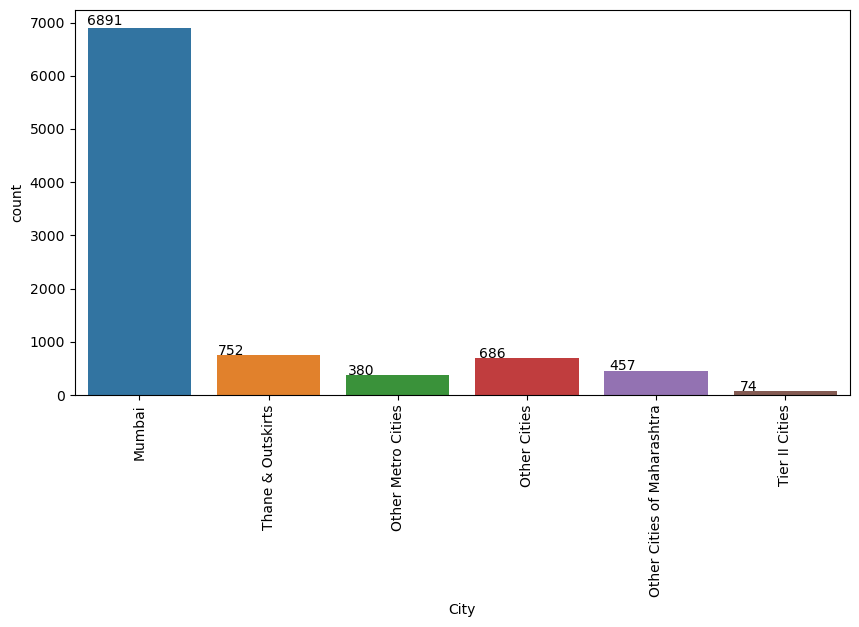

In [39]:
#plotting the same
plt.figure(figsize = (10,5))
ax= sns.countplot(df['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [40]:
# Checking the dataset after the change
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Removing the columns that are generated after a call is placed to the lead 

In [41]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
           'Asymmetrique Activity Score','Asymmetrique Profile Score',
           'Tags','Lead Quality'], 1, inplace = True)

In [42]:
# Checking the dataset after the change
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

#### We can drop the rows with missing value less then 1.5% 

In [43]:
df.dropna(inplace = True)

#### Checking after the change
round(100*(df.isnull().sum()/len(df.index)), 2)

We have dealed with the missing values

In [44]:
# Checking the dataset after cleaning it
df.shape

(9074, 27)

#### We have dealed with all the missing values 

## Exploratory Data Analysis 

### Univariate Analysis 

#### 'Converted' 

Converted is the target variable which indicates weather a lead has been successfully converted(1) or not(0)

In [45]:
converted = round((sum(df['Converted'])/len(df['Converted'].index))*100,2)

print("We have almost {} %  Converted rate".format(converted))

We have almost 37.86 %  Converted rate


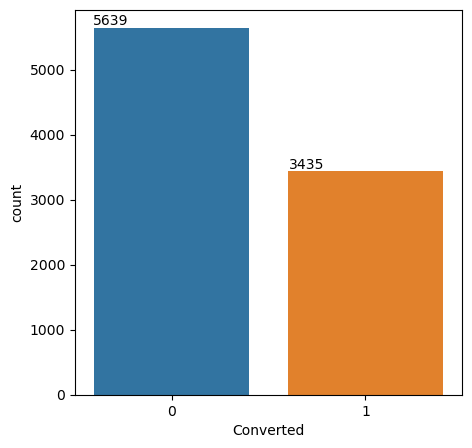

In [46]:
plt.figure(figsize = (5,5))
ax= sns.countplot(x = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

#### 'Lead Origin'   

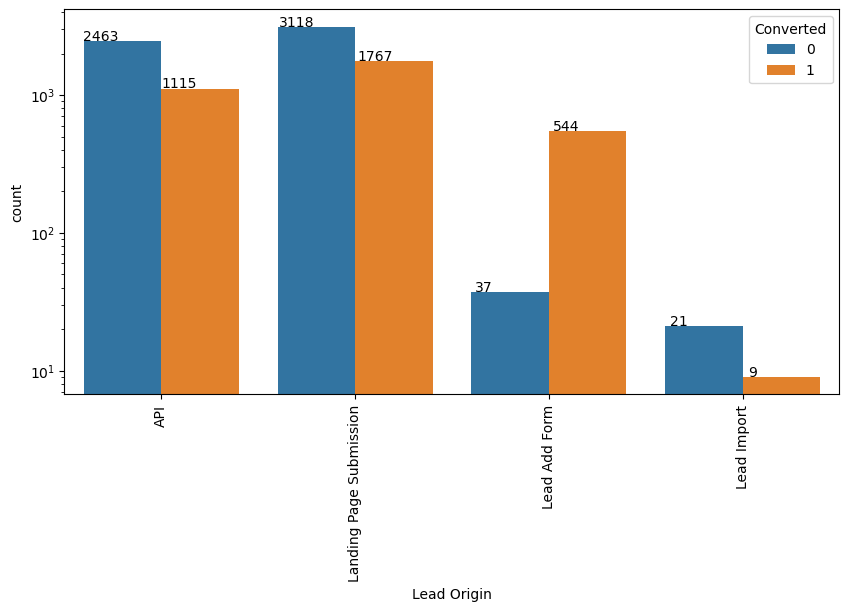

In [47]:
# Plotting for lead origin
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.


. Lead Add Form has more than 90% conversion rate but count of lead are not very high.


. Lead Import are very less in count.

##### To improve overall lead conversion rate, we need to focus on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form. 

#### 'Lead Source' 

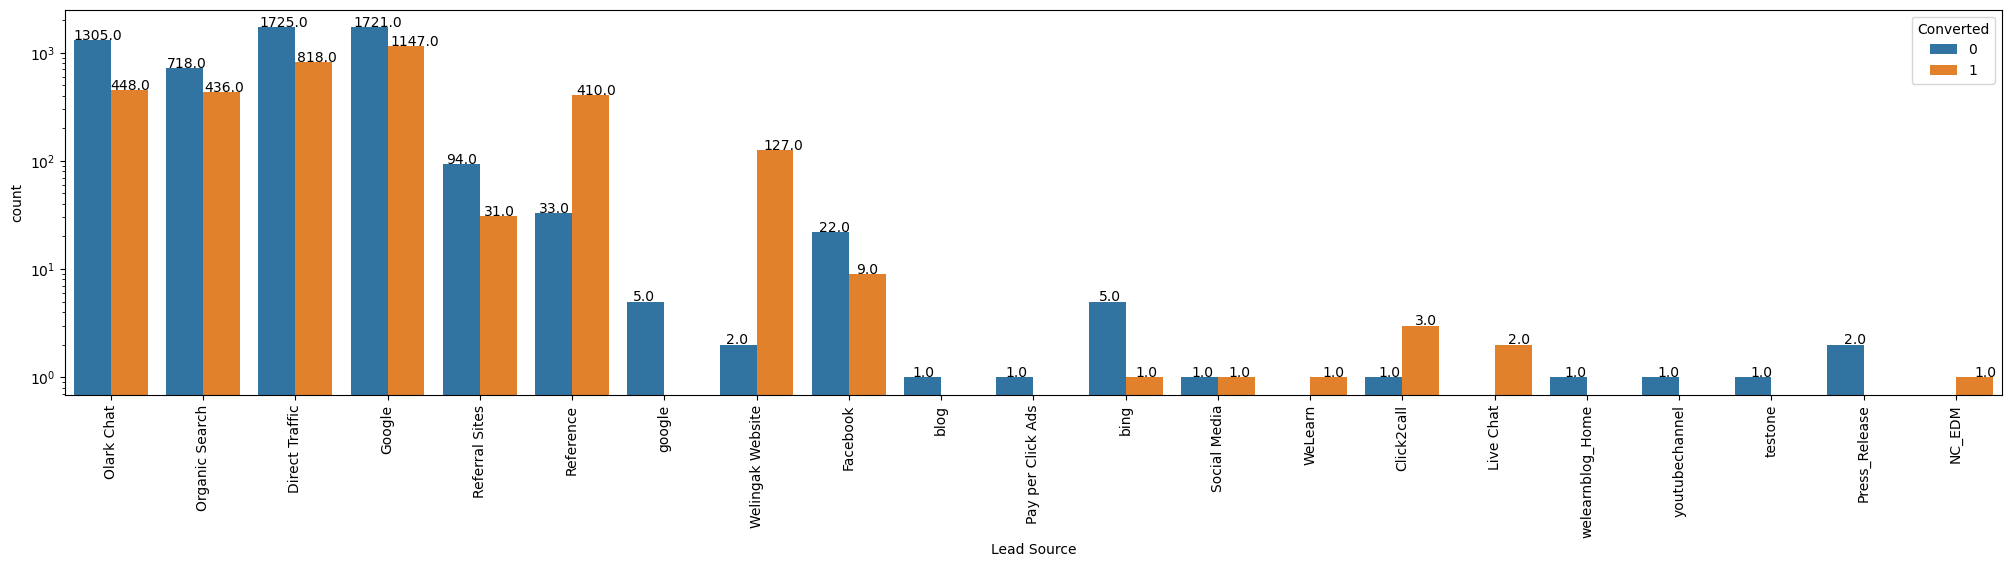

In [48]:
#plotting for 'Lead Source' column
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [49]:
# Replacing few datapoints under to new 'others' category to simplify the dataset
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

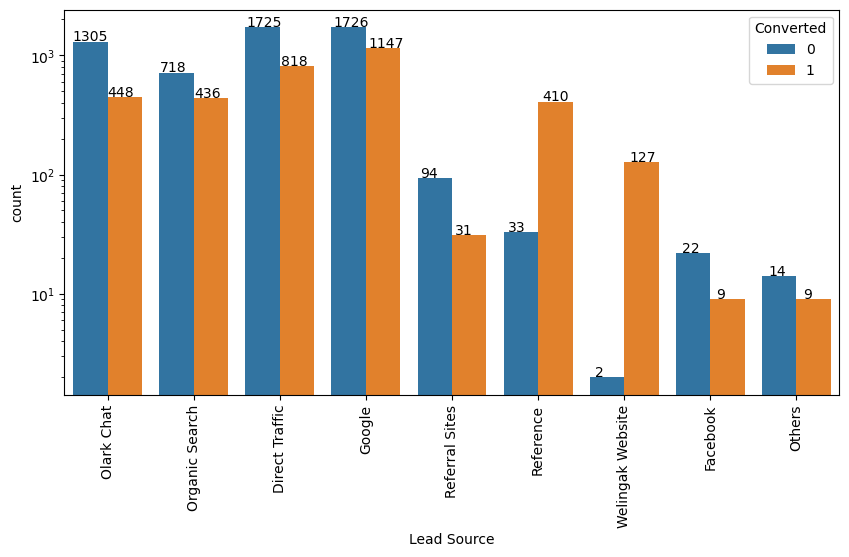

In [50]:
#plotting again
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

.Google and Direct traffic generates maximum number of leads.

.Conversion Rate of reference leads and leads through welingak website is high.

##### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website. 

#### "Do Not Email" & "Do Not Call" 

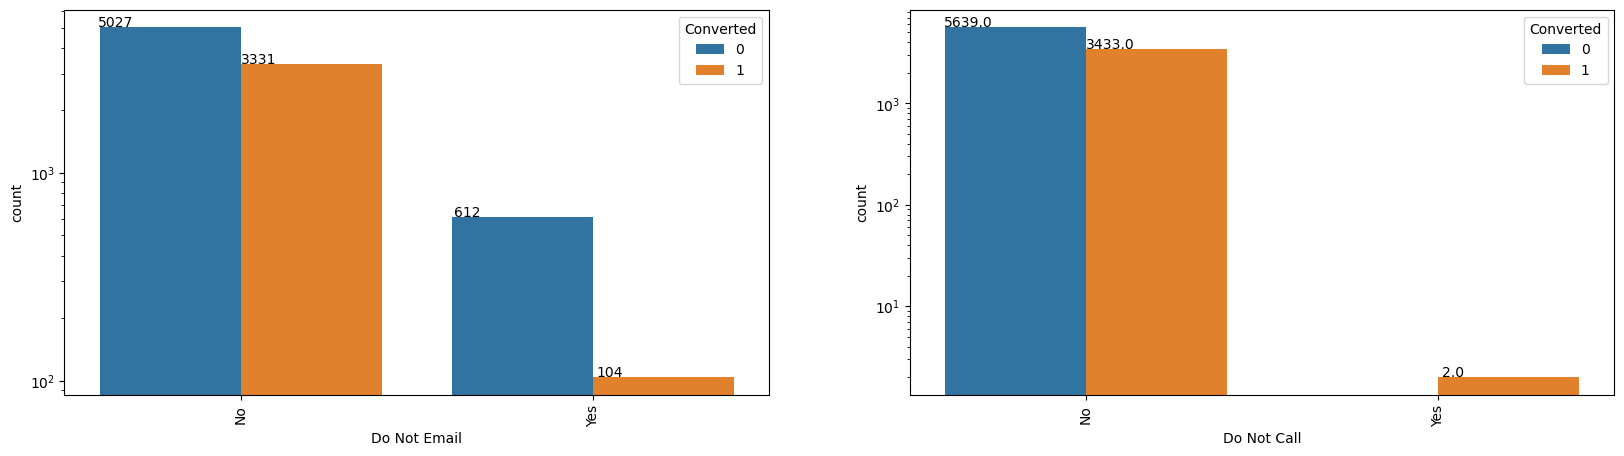

In [51]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

#### "Total Visits" 

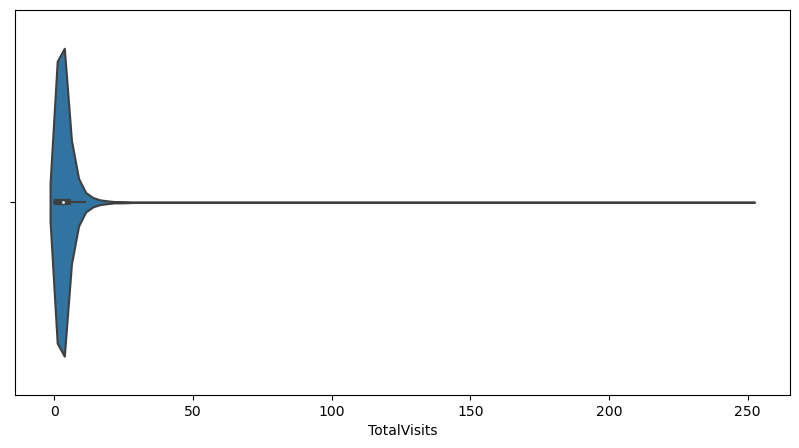

In [52]:
# plotting for "Total Visits" 
plt.figure(figsize = (10,5))
sns.violinplot(df['TotalVisits'])
plt.show()

. As we can see there are a number of outliers in the data.

. We will cap the outliers to 95% value for analysis.

In [53]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

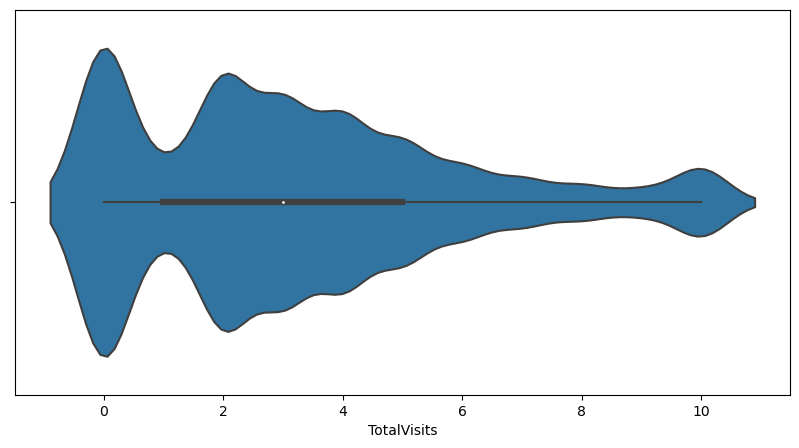

In [55]:
plt.figure(figsize = (10,5))
sns.violinplot(df['TotalVisits'])
plt.show()

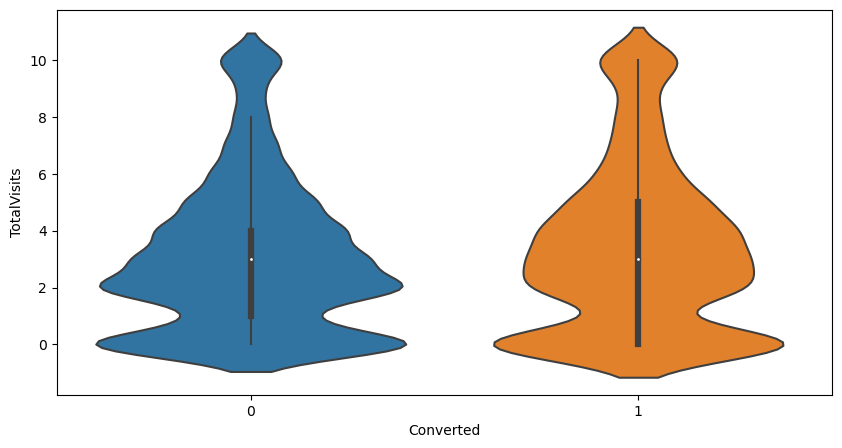

In [56]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

. Median for converted and not converted leads are the same.

#### 'Total time spent on website' 

In [57]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

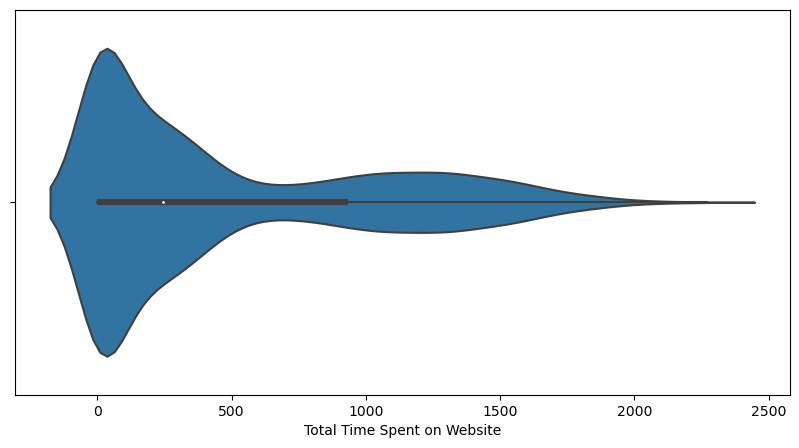

In [58]:
# plotting for 'Total Time Spent on Website'
plt.figure(figsize = (10,5))
sns.violinplot(df['Total Time Spent on Website'])
plt.show()

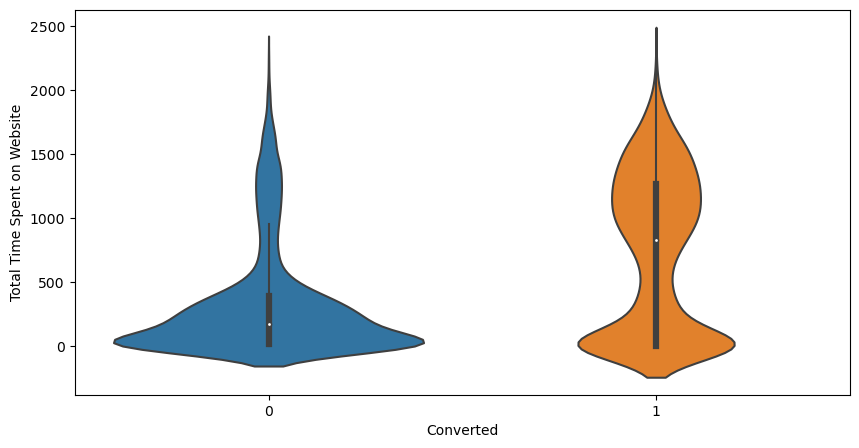

In [59]:
#plotting for total time spent on the Website and the converted column
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

.Leads spending more time on the weblise are more likely to be converted.

##### More engaging the website the more chances the leads will spend more time on it and get converted.

#### 'Page views per visit' 

In [60]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

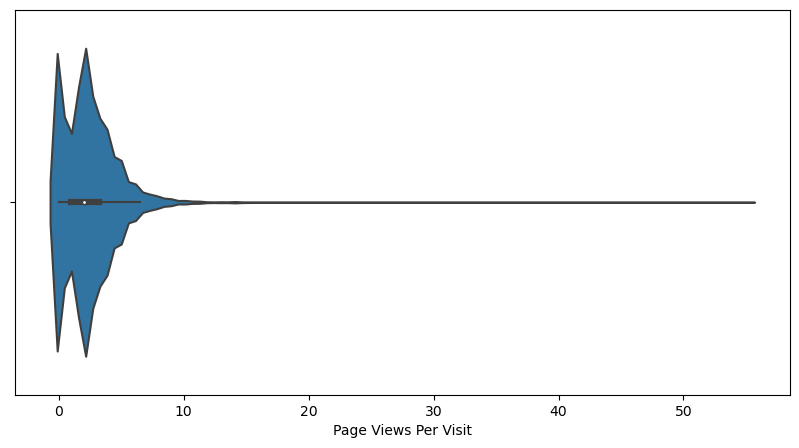

In [61]:
# Plotting for the same
plt.figure(figsize = (10,5))
sns.violinplot(df['Page Views Per Visit'])
plt.show()

As there seems to be outliers with the data we will cap the outliers to 95% value for analysis

In [62]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

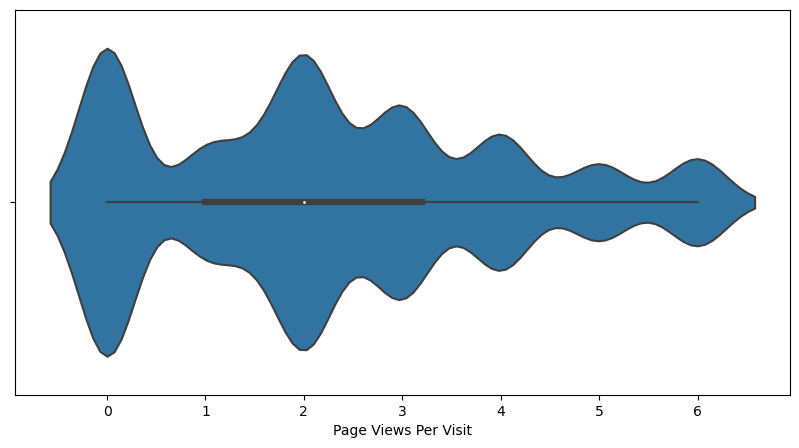

In [63]:
#plotting to check again after change
plt.figure(figsize = (10,5))
sns.violinplot(df['Page Views Per Visit'])
plt.show()

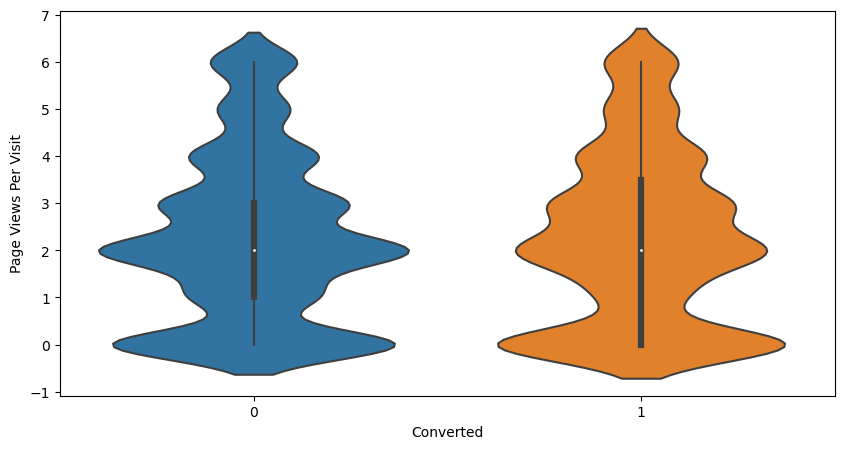

In [64]:
#plotting for 'Page Views Per Visit' and the 'Converted' column
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

Median for converted and unconverted leads is the same.

#### 'Last Activity' 

In [65]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [66]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

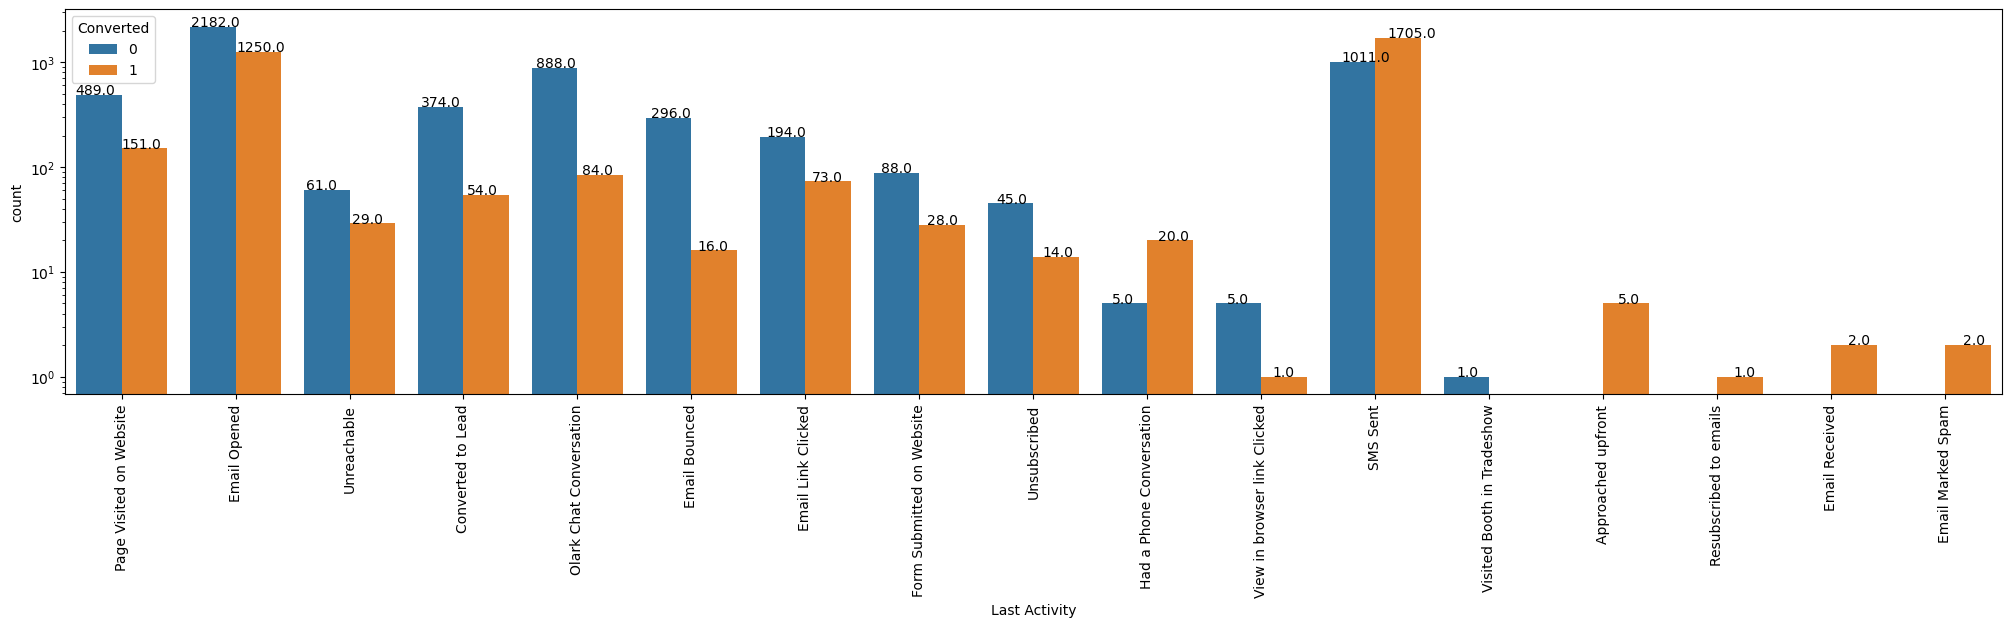

In [67]:
#plotting to check the same
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Keeping considerable last activities as such and club all others to "Other_Activity"

In [68]:
#Clubbing to other activities
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

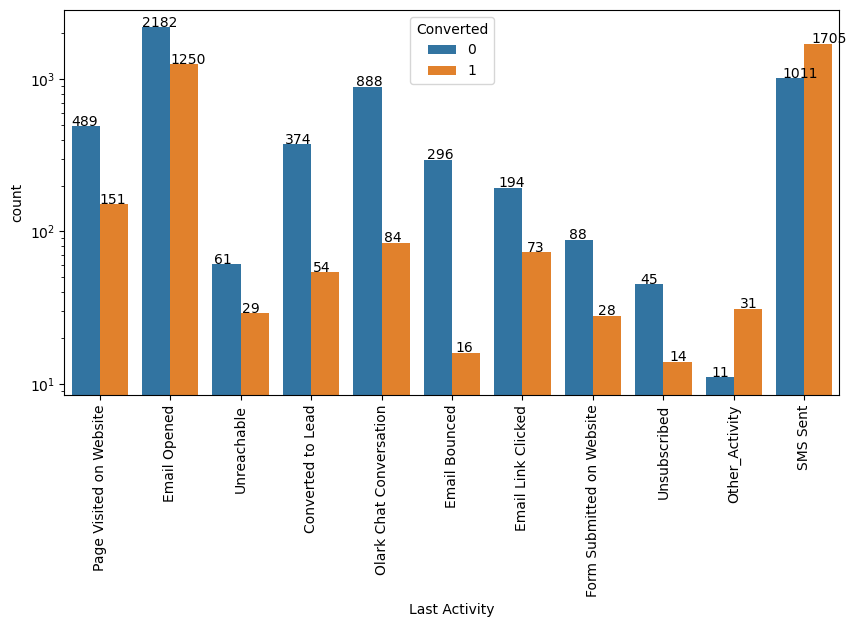

In [69]:
#Checking once again after the change
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Most leads had their email opened as there last activity.

. Conversion rate for SMS_Sent as the last activity is the highest. 

#### 'Country' 

In [70]:
df.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [71]:
df.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

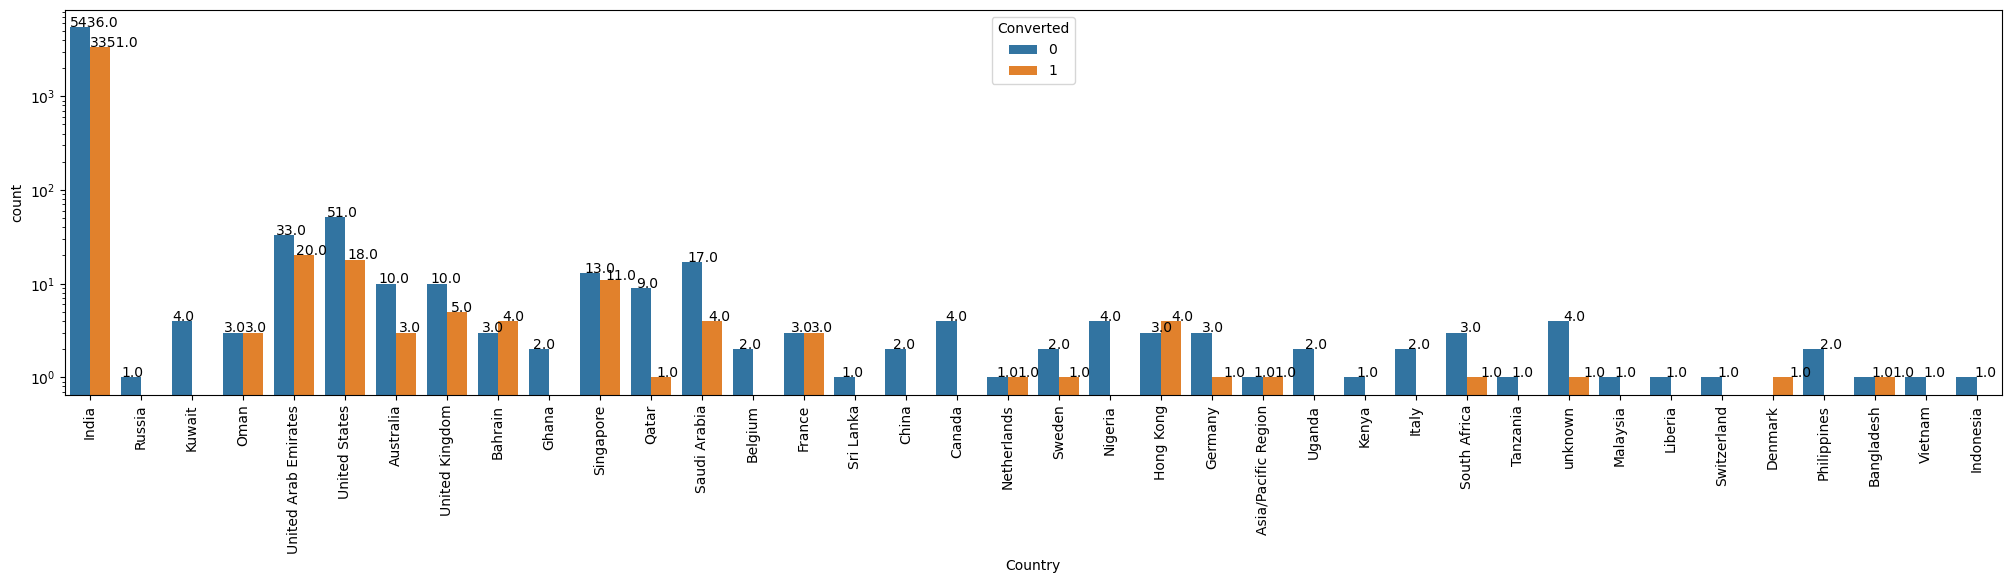

In [72]:
#plotting for the same
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. There is a potential to increase market in the United States and the Middle East

. We can observe that the core of the business is from Indian Market.

#### 'Specialization ' 

In [73]:
df.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [74]:
df.Specialization.value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

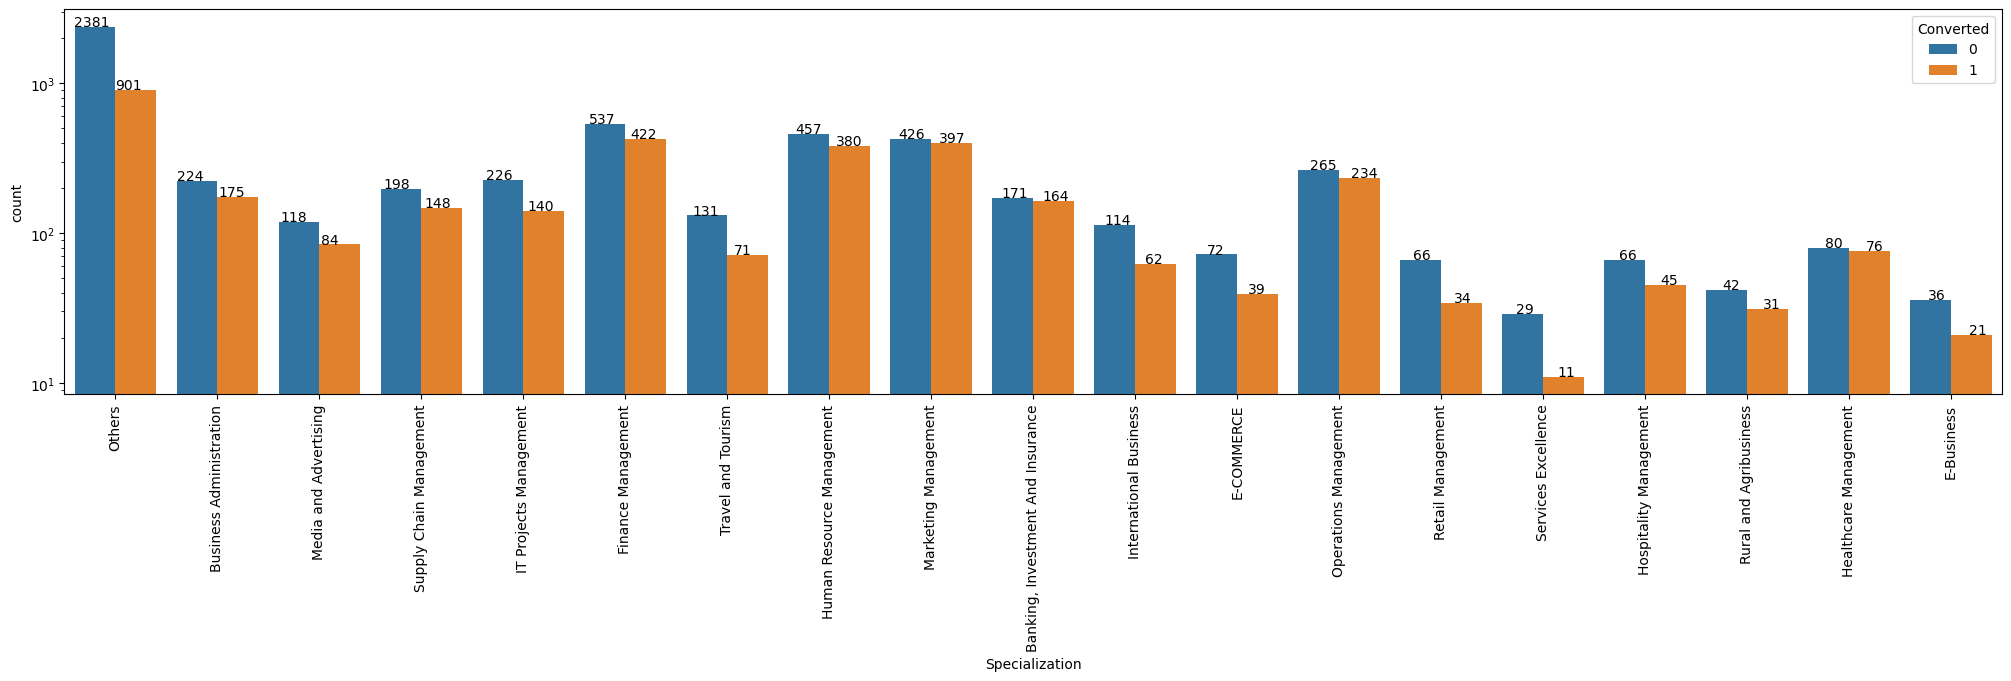

In [75]:
#Plotting for the same 
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. We can focus on Finance Management, Human Resource Management, Marketing Management to increase the conversion rate.

#### 'Occupation' 

In [76]:
df['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [77]:
df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

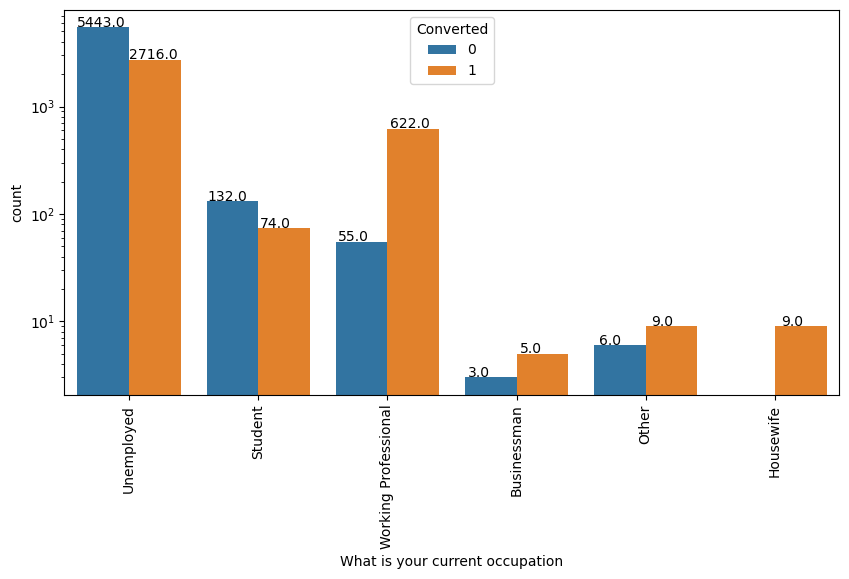

In [78]:
# Plotting for the same
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Unemployed leads are more but the conversion rate is low.

. Working Proffesionals has a highest chance of joining the course.

#### 'What matters most to you in choosing a course'  

In [79]:
df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [80]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

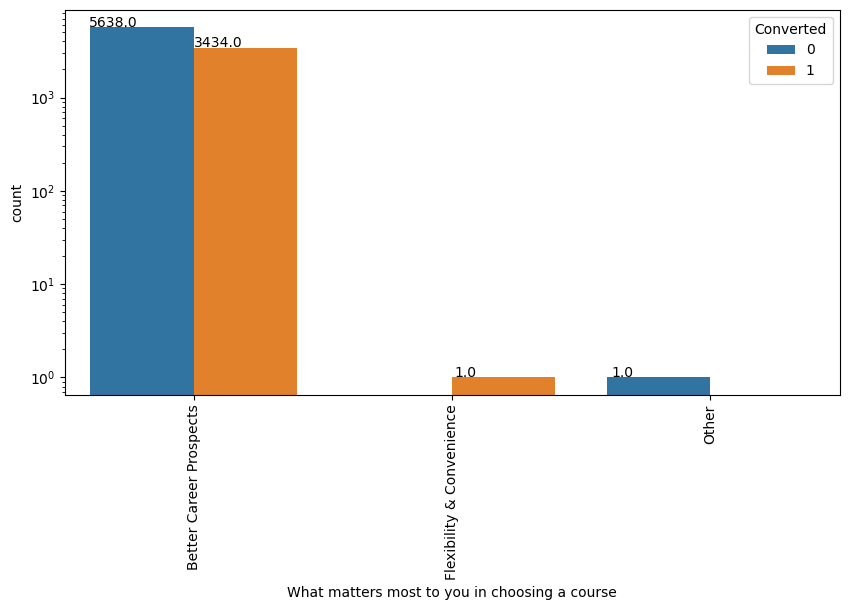

In [81]:
# Plotting for the same
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Unable to draw conclusion as most entries is for 'Better Career Prospects'.

#### 'Search' 

In [82]:
df['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [83]:
df.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

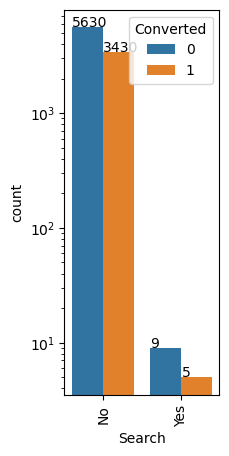

In [84]:
#plotting for the same
plt.figure(figsize = (2,5))
ax= sns.countplot(x = "Search", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Unable to draw inference as most entries are 'no'.

#### 'Magazine' 

In [85]:
df.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [86]:
df.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

. All the entries are 'No', unable to infer anything

#### 'Newspaper Article' 

In [87]:
df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [88]:
df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

. Most of the entries are 'No'.

#### 'X Education Forums' 

In [89]:
df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [90]:
df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

.Most entries are 'No'. No Inference can be drawn with this parameter.

#### 'Newspaper'

In [91]:
df['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [92]:
df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

. Most entries are 'No' hence no infernce can be made

#### 'Digital Advertisment'

In [93]:
df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [94]:
df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

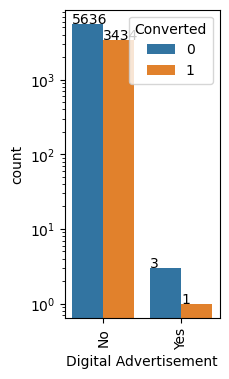

In [95]:
plt.figure(figsize = (2,4))
ax= sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Most entries are 'No' hence no infernce can be made

#### 'Through Recommendations'

In [96]:
df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [97]:
df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

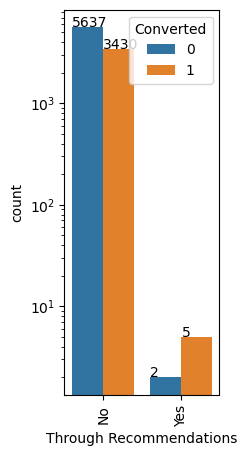

In [98]:
plt.figure(figsize = (2,5))
ax= sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Most entries are 'No' hence no infernce can be made.

#### 'Receive More Updates About Our Courses'

In [99]:
df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [100]:
df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

All entries are 'No'. No Inference can be drawn with this parameter.

#### 'Update me on Supply Chain Content'

In [101]:
df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [102]:
df['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

All entries are 'No'. No Inference can be drawn with this parameter.

#### 'Get updates on DM Content'

In [103]:
df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [104]:
df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

. All entries are 'No'. No Inference can be drawn with this parameter.

#### 'I agree to pay the amount through cheque'

In [105]:
df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [106]:
df['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

.All entries are 'No'. No Inference can be drawn with this parameter.

#### 'A free copy of Mastering The Interview'

In [107]:
df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [108]:
df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

'A free copy of Mastering The Interview' doesn't play role in decision making.

#### 'City'

In [109]:
df.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

In [110]:
df.City.value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

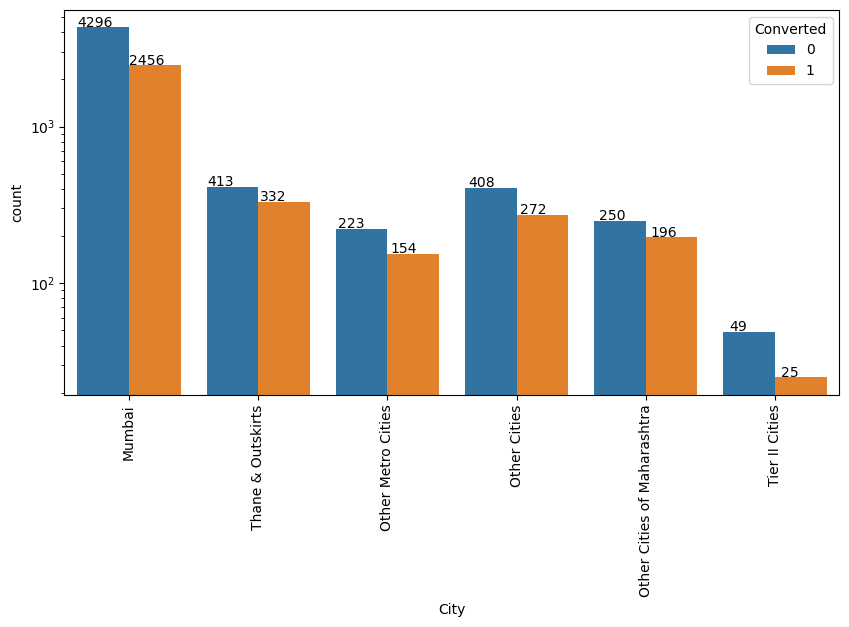

In [111]:
#plotting for the same 
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "City", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Most leads are from Mumbai with a conversion rate of around 30%.

#### 'Last Notable Activity'

In [112]:
df['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

In [113]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

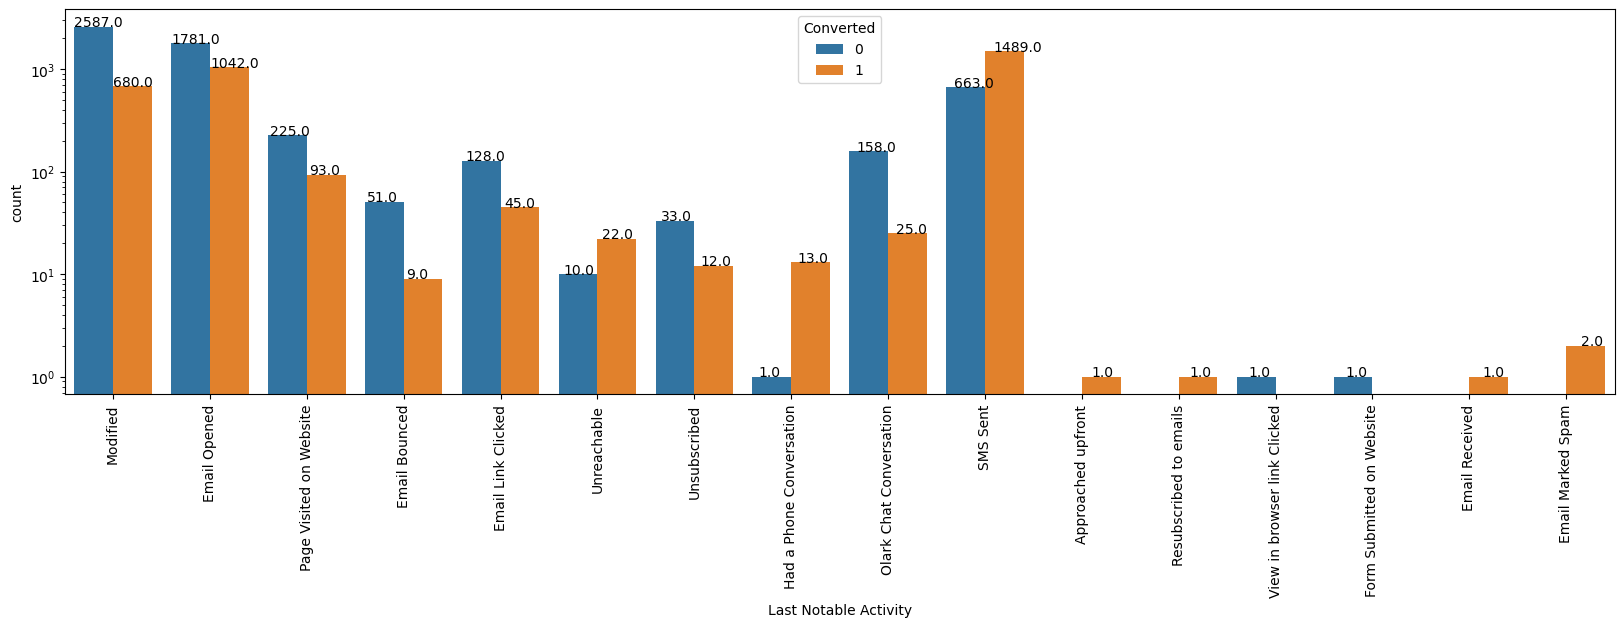

In [114]:
#plotting for the same 
plt.figure(figsize = (20,5))
ax= sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

. Highest conversion rate is from SMS Sent noted as the last activity.

#### Based on the univariate analysis we see that many columns are not adding any information to the model, hence we can drop them for further analysis.

In [115]:
# Dropping the columns with most 'No's as entries
df = df.drop(['What matters most to you in choosing a course','Search',
                  'Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','Country'],1)

In [116]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


In [117]:
# Checking the columns 'Last activity' and 'Last Notable activity'
print(df['Last Activity'].value_counts())

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64


In [118]:
print(df['Last Notable Activity'].value_counts())

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


Values of 'Last activity' is already covered as values under 'Last notable activity'. Hence we can drop any one of the column.

In [119]:
df.drop(['Last Notable Activity'], 1, inplace = True)

In [120]:
df.shape

(9074, 12)

In [121]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai


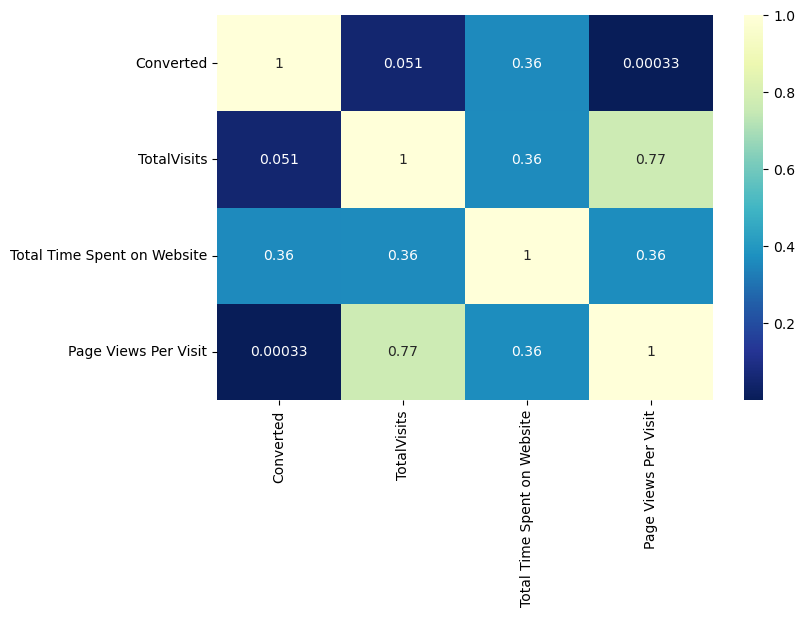

In [122]:
# Checking the correlaton coefficient between different variables
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu_r")
plt.show()

.Total Visits & Page Views per Vist are higly correlated with correlation of 0.77.

## Data Preparation

### Converting Binary Variables (Yes/No) to (1/0)

In [123]:
#List of variables to be mapped
varlist =  ['Do Not Email', 'Do Not Call']

In [124]:
#Defining the map function
def bin_map(x):
    return x.map({'Yes': 1, 'No': 0})


# Applying the function to the variables list
df[varlist] = df[varlist].apply(bin_map)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai


#### Creating dummy variables for the categorical columns 

In [125]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City']], drop_first=True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [126]:
# Adding the dummies to the main dataframe

df = pd.concat([df, dummy], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [127]:
# Dropping the firt columns
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                  'What is your current occupation','City'], axis = 1)

df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [128]:
df.shape

(9074, 55)

#### Splitting the dataframe into X and y  

In [129]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [130]:
X.shape

(9074, 54)

In [131]:
# Putting response variable to y
y = df['Converted']

In [132]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [133]:
y.shape

(9074,)

#### Splitting the data into train and test  

In [134]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=300)

In [135]:
#checking 
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3535,0,0,4.0,1021,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
705,0,0,2.0,32,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6815,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1940,0,0,2.0,471,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7204,0,0,5.0,1816,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [136]:
X_train.shape

(7259, 54)

In [137]:
X_test.shape

(1815, 54)

In [138]:
y_train.shape

(7259,)

In [139]:
y_test.shape

(1815,)

### Feature Scaling 

In [140]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3535,0,0,0.303810,0.993976,-0.140806,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
705,0,0,-0.418785,-0.824383,-0.140806,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6815,0,0,-1.141380,-0.883218,-1.261866,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1940,0,0,-0.418785,-0.017245,-0.140806,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7204,0,0,0.665108,2.455649,1.540782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [141]:
# Checking the Converted Rate
Converted = round((sum(df['Converted'])/len(df['Converted'].index))*100,2)
print("We have almost {} %  Converted rate after data manipulation".format(Converted))

We have almost 37.86 %  Converted rate after data manipulation


## Model Building 

#### Logistic Regression Model

In [142]:
lrm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lrm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7204
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2968.3
Date:                Tue, 28 Feb 2023   Deviance:                       5936.7
Time:                        01:23:35   Pearson chi2:                 7.89e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3964
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9484      1.115     -0.851      0.395      -3.133       1.236
Do Not Email                                            -1.3205      0.204     -6.475      0.000      -1.720      -0.921
Do Not Call                                             20.3398   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.3336      0.053      6.354      0.000       0.231       0.437
Total Time Spent on Website                              1.0997      0.038     28.857      0.000       1.025       1.174
Page Views Per Visit                                    -0.3498      0.059     -5.931      0.000      -0.465      -0.234
Lead Origin_Landing Page Submission                     -0.8759      0.129     -6.798      0.000      -1.128      -0.623
Lead Origin_Lead Add Form                                1.6461      1.001      1.644      0.100      -0.317       3.609
Lead Origin_Lead Import                                 22.4998   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.5370   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.2553      0.091      2.800      0.005       0.077       0.434
Lead Source_Olark Chat                                   1.2915      0.150      8.620      0.000       0.998       1.585
Lead Source_Organic Search                               0.2064      0.122      1.691      0.091      -0.033       0.446
Lead Source_Others                                       0.4704      0.763      0.617      0.537      -1.024       1.965
Lead Source_Reference                                    1.9842      1.024      1.938      0.053      -0.022       3.991
Lead Source_Referral Sites                               0.1365      0.310      0.440      0.660      -0.471       0.744
Lead Source_Welingak Website                             4.3754      1.240      3.529      0.000       1.945       6.806
Last Activity_Email Bounced                              0.0930      0.435      0.214      0.831      -0.760       0.946
Last Activity_Email Link Clicked                         0.8094      0.275      2.948      0.003       0.271       1.347
Last Activity_Email Opened                               1.1725      0.204      5.753      0.000       0.773       1.572
Last Activity_Form Submitted on Website                  0.2947      0.353      0.835      0.404      -0.397       0.987
Last Activity_Olark Chat Conversation                   -0.3738      0.250     -1.494      0.135      -0.864       0.117
Last Activity_Other_Activity                             3

## Feature Selection Using RFE 

In [143]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,step = 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [144]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False, False])

In [145]:
#checking the columns selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_

In [146]:
#columns which were picked by RFE
col = X_train.columns[rfe.support_]
col.shape

(27,)

In [147]:
#columns not picked by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_

## Assessing the model with StatsModels 

In [148]:
X_train_sm = sm.add_constant(X_train[col])
lrm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7231
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2978.8
Date:                Tue, 28 Feb 2023   Deviance:                       5957.6
Time:                        01:23:36   Pearson chi2:                 7.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5110      1.088     -0.470      0.639      -2.644       1.622
Do Not Email                                            -1.3735      0.182     -7.551      0.000      -1.730      -1.017
TotalVisits                                              0.3614      0.051      7.148      0.000       0.262       0.460
Total Time Spent on Website                              1.1020      0.038     29.054      0.000       1.028       1.176
Page Views Per Visit                                    -0.3281      0.058     -5.688      0.000      -0.441      -0.215
Lead Origin_Landing Page Submission                     -0.9702      0.121     -7.991      0.000      -1.208      -0.732
Lead Origin_Lead Add Form                                1.8986      0.867      2.189      0.029       0.199       3.598
Lead Origin_Lead Import                                 22.3334   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.5084   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                                   1.1411      0.132      8.634      0.000       0.882       1.400
Lead Source_Reference                                    1.5848      0.889      1.783      0.075      -0.157       3.327
Lead Source_Welingak Website                             3.9738      1.129      3.518      0.000       1.760       6.187
Last Activity_Email Link Clicked                         0.5376      0.216      2.490      0.013       0.114       0.961
Last Activity_Email Opened                               0.8971      0.114      7.859      0.000       0.673       1.121
Last Activity_Olark Chat Conversation                   -0.6557      0.183     -3.583      0.000      -1.014      -0.297
Last Activity_Other_Activity                             3.0299      0.533      5.682      0.000       1.985       4.075
Last Activity_SMS Sent                                   2.1167      0.117     18.044      0.000       1.887       2.347
Last Activity_Unreachable                                1.0053      0.319      3.152      0.002       0.380       1.630
Last Activity_Unsubscribed                               1.7049      0.493      3.455      0.001       0.738       2.672
Specialization_Hospitality Management                   -0.6335      0.304     -2.085      0.037      -1.229      -0.038
Specialization_Others                                   -1.1386      0.118     -9.638      0.000      -1.370      -0.907
Specialization_Retail Management                        -0.3076      0.311     -0.988      0.323      -0.918       0.303
Specialization_Travel and Tourism                       -0

### VIF

In [149]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,57.11
9,Lead Source_Reference,44.51
6,Lead Origin_Lead Import,25.29
7,Lead Source_Facebook,25.22
25,What is your current occupation_Unemployed,17.40
10,Lead Source_Welingak Website,13.46
4,Lead Origin_Landing Page Submission,7.49
19,Specialization_Others,4.83
12,Last Activity_Email Opened,3.96
3,Page Views Per Visit,3.33


#### 'What is your current occupation_Housewife' has a high p score and we will drop it

In [151]:
col1 = col.drop('What is your current occupation_Housewife',1)
col1

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [152]:
X_train_sm = sm.add_constant(X_train[col1])
lrm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7232
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2980.4
Date:                Tue, 28 Feb 2023   Deviance:                       5960.8
Time:                        01:23:36   Pearson chi2:                 7.83e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4794      0.811      0.591      0.555      -1.110       2.069
Do Not Email                                            -1.3746      0.182     -7.557      0.000      -1.731      -1.018
TotalVisits                                              0.3591      0.051      7.106      0.000       0.260       0.458
Total Time Spent on Website                              1.1032      0.038     29.087      0.000       1.029       1.177
Page Views Per Visit                                    -0.3278      0.058     -5.683      0.000      -0.441      -0.215
Lead Origin_Landing Page Submission                     -0.9623      0.121     -7.943      0.000      -1.200      -0.725
Lead Origin_Lead Add Form                                1.9019      0.867      2.193      0.028       0.202       3.602
Lead Origin_Lead Import                                 20.3423   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                                   -19.5140   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                                   1.1417      0.132      8.638      0.000       0.883       1.401
Lead Source_Reference                                    1.5858      0.889      1.784      0.074      -0.156       3.328
Lead Source_Welingak Website                             3.9711      1.129      3.516      0.000       1.757       6.185
Last Activity_Email Link Clicked                         0.5372      0.216      2.490      0.013       0.114       0.960
Last Activity_Email Opened                               0.8960      0.114      7.859      0.000       0.673       1.119
Last Activity_Olark Chat Conversation                   -0.6610      0.183     -3.612      0.000      -1.020      -0.302
Last Activity_Other_Activity                             3.0299      0.533      5.683      0.000       1.985       4.075
Last Activity_SMS Sent                                   2.1150      0.117     18.047      0.000       1.885       2.345
Last Activity_Unreachable                                1.0041      0.319      3.148      0.002       0.379       1.629
Last Activity_Unsubscribed                               1.7041      0.493      3.454      0.001       0.737       2.671
Specialization_Hospitality Management                   -0.6337      0.304     -2.086      0.037      -1.229      -0.038
Specialization_Others                                   -1.1336      0.118     -9.614      0.000      -1.365      -0.902
Specialization_Retail Management                        -0.3081      0.311     -0.989      0.323      -0.918       0.302
Specialization_Travel and Tourism                       -0

In [153]:
# Checking the VIF 1st model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,57.11
9,Lead Source_Reference,44.50
6,Lead Origin_Lead Import,25.29
7,Lead Source_Facebook,25.22
24,What is your current occupation_Unemployed,17.20
10,Lead Source_Welingak Website,13.46
4,Lead Origin_Landing Page Submission,7.43
19,Specialization_Others,4.81
12,Last Activity_Email Opened,3.94
3,Page Views Per Visit,3.33


#### 'Lead Origin_Lead Import' has a high p score and we will drop this feature

In [154]:
# dropping Lead Origin_Lead Import
col1 = col1.drop('Lead Origin_Lead Import',1)

In [155]:
X_train_sm = sm.add_constant(X_train[col1])
lrm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7233
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.0
Date:                Tue, 28 Feb 2023   Deviance:                       5961.9
Time:                        01:23:37   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4849      0.811      0.598      0.550      -1.106       2.075
Do Not Email                                            -1.3737      0.182     -7.552      0.000      -1.730      -1.017
TotalVisits                                              0.3588      0.051      7.101      0.000       0.260       0.458
Total Time Spent on Website                              1.1026      0.038     29.081      0.000       1.028       1.177
Page Views Per Visit                                    -0.3295      0.058     -5.717      0.000      -0.443      -0.217
Lead Origin_Landing Page Submission                     -0.9701      0.121     -8.025      0.000      -1.207      -0.733
Lead Origin_Lead Add Form                                1.8935      0.867      2.184      0.029       0.194       3.593
Lead Source_Facebook                                     0.7264      0.479      1.516      0.130      -0.213       1.665
Lead Source_Olark Chat                                   1.1370      0.132      8.611      0.000       0.878       1.396
Lead Source_Reference                                    1.5871      0.889      1.786      0.074      -0.155       3.329
Lead Source_Welingak Website                             3.9748      1.129      3.520      0.000       1.762       6.188
Last Activity_Email Link Clicked                         0.5375      0.216      2.491      0.013       0.115       0.960
Last Activity_Email Opened                               0.8975      0.114      7.873      0.000       0.674       1.121
Last Activity_Olark Chat Conversation                   -0.6600      0.183     -3.606      0.000      -1.019      -0.301
Last Activity_Other_Activity                             3.0297      0.533      5.682      0.000       1.985       4.075
Last Activity_SMS Sent                                   2.1148      0.117     18.045      0.000       1.885       2.345
Last Activity_Unreachable                                1.0046      0.319      3.149      0.002       0.379       1.630
Last Activity_Unsubscribed                               1.7039      0.493      3.453      0.001       0.737       2.671
Specialization_Hospitality Management                   -0.6320      0.304     -2.080      0.037      -1.227      -0.037
Specialization_Others                                   -1.1413      0.118     -9.701      0.000      -1.372      -0.911
Specialization_Retail Management                        -0.3083      0.311     -0.990      0.322      -0.919       0.302
Specialization_Travel and Tourism                       -0.2992      0.229     -1.306      0.192      -0.748       0.150
What is your current occupation_Other                   -1

In [156]:
# checking the VIF for 2nd model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,57.11
8,Lead Source_Reference,44.50
23,What is your current occupation_Unemployed,17.16
9,Lead Source_Welingak Website,13.46
4,Lead Origin_Landing Page Submission,7.41
18,Specialization_Others,4.80
11,Last Activity_Email Opened,3.94
3,Page Views Per Visit,3.32
14,Last Activity_SMS Sent,3.23
7,Lead Source_Olark Chat,3.16


#### Dropping 'Lead Origin_Lead Add Form' due to high VIF

In [157]:
col1 = col1.drop('Lead Origin_Lead Add Form',1)

In [158]:
X_train_sm = sm.add_constant(X_train[col1])
lrm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7234
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.7
Date:                Tue, 28 Feb 2023   Deviance:                       5967.3
Time:                        01:23:37   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3939
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5034      0.812      0.620      0.535      -1.088       2.095
Do Not Email                                            -1.3748      0.182     -7.561      0.000      -1.731      -1.018
TotalVisits                                              0.3564      0.050      7.061      0.000       0.257       0.455
Total Time Spent on Website                              1.0999      0.038     29.067      0.000       1.026       1.174
Page Views Per Visit                                    -0.3349      0.058     -5.816      0.000      -0.448      -0.222
Lead Origin_Landing Page Submission                     -0.9927      0.121     -8.231      0.000      -1.229      -0.756
Lead Source_Facebook                                     0.6973      0.479      1.455      0.146      -0.242       1.637
Lead Source_Olark Chat                                   1.1166      0.131      8.494      0.000       0.859       1.374
Lead Source_Reference                                    3.4508      0.248     13.891      0.000       2.964       3.938
Lead Source_Welingak Website                             5.8455      0.737      7.937      0.000       4.402       7.289
Last Activity_Email Link Clicked                         0.5362      0.216      2.487      0.013       0.114       0.959
Last Activity_Email Opened                               0.9008      0.114      7.915      0.000       0.678       1.124
Last Activity_Olark Chat Conversation                   -0.6620      0.183     -3.620      0.000      -1.020      -0.304
Last Activity_Other_Activity                             3.0276      0.533      5.678      0.000       1.983       4.073
Last Activity_SMS Sent                                   2.1170      0.117     18.087      0.000       1.888       2.346
Last Activity_Unreachable                                1.0046      0.319      3.150      0.002       0.380       1.630
Last Activity_Unsubscribed                               1.7046      0.493      3.457      0.001       0.738       2.671
Specialization_Hospitality Management                   -0.6351      0.304     -2.090      0.037      -1.231      -0.040
Specialization_Others                                   -1.1593      0.117     -9.867      0.000      -1.390      -0.929
Specialization_Retail Management                        -0.3110      0.312     -0.998      0.318      -0.922       0.300
Specialization_Travel and Tourism                       -0.2982      0.229     -1.302      0.193      -0.747       0.151
What is your current occupation_Other                   -1.1204      1.109     -1.010      0.313      -3.295       1.054
What is your current occupation_Student                 -1

In [159]:
# checking the VIF for 3rd model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,What is your current occupation_Unemployed,17.10
4,Lead Origin_Landing Page Submission,7.38
17,Specialization_Others,4.79
10,Last Activity_Email Opened,3.94
3,Page Views Per Visit,3.32
13,Last Activity_SMS Sent,3.23
6,Lead Source_Olark Chat,3.16
1,TotalVisits,2.60
23,What is your current occupation_Working Profes...,2.26
11,Last Activity_Olark Chat Conversation,2.15


#### 'What is your current occupation_Unemployed' is being dropped because of high VIF.

In [160]:
col1 = col1.drop('What is your current occupation_Unemployed',1)

In [161]:
X_train_sm = sm.add_constant(X_train[col1])
lrm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7235
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2986.0
Date:                Tue, 28 Feb 2023   Deviance:                       5972.0
Time:                        01:23:38   Pearson chi2:                 7.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3935
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1979      0.148     -8.080      0.000      -1.488      -0.907
Do Not Email                                            -1.3785      0.182     -7.582      0.000      -1.735      -1.022
TotalVisits                                              0.3565      0.050      7.065      0.000       0.258       0.455
Total Time Spent on Website                              1.0989      0.038     29.065      0.000       1.025       1.173
Page Views Per Visit                                    -0.3335      0.058     -5.796      0.000      -0.446      -0.221
Lead Origin_Landing Page Submission                     -1.0034      0.121     -8.312      0.000      -1.240      -0.767
Lead Source_Facebook                                     0.6917      0.479      1.443      0.149      -0.248       1.632
Lead Source_Olark Chat                                   1.1156      0.131      8.489      0.000       0.858       1.373
Lead Source_Reference                                    3.4627      0.248     13.948      0.000       2.976       3.949
Lead Source_Welingak Website                             5.8453      0.736      7.937      0.000       4.402       7.289
Last Activity_Email Link Clicked                         0.5303      0.215      2.463      0.014       0.108       0.952
Last Activity_Email Opened                               0.8943      0.114      7.866      0.000       0.671       1.117
Last Activity_Olark Chat Conversation                   -0.6632      0.183     -3.629      0.000      -1.021      -0.305
Last Activity_Other_Activity                             3.0169      0.533      5.658      0.000       1.972       4.062
Last Activity_SMS Sent                                   2.1075      0.117     18.030      0.000       1.878       2.337
Last Activity_Unreachable                                0.9941      0.319      3.117      0.002       0.369       1.619
Last Activity_Unsubscribed                               1.6985      0.493      3.446      0.001       0.732       2.665
Specialization_Hospitality Management                   -0.6399      0.304     -2.106      0.035      -1.235      -0.044
Specialization_Others                                   -1.1714      0.118     -9.959      0.000      -1.402      -0.941
Specialization_Retail Management                        -0.3147      0.311     -1.010      0.312      -0.925       0.296
Specialization_Travel and Tourism                       -0.3019      0.229     -1.318      0.187      -0.751       0.147
What is your current occupation_Other                    0.5923      0.764      0.775      0.438      -0.905       2.090
What is your current occupation_Student                  0

In [162]:
# checking the VIF for 4th model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.31
4,Lead Origin_Landing Page Submission,3.25
6,Lead Source_Olark Chat,2.98
10,Last Activity_Email Opened,2.88
17,Specialization_Others,2.76
1,TotalVisits,2.56
13,Last Activity_SMS Sent,2.52
11,Last Activity_Olark Chat Conversation,1.89
7,Lead Source_Reference,1.55
2,Total Time Spent on Website,1.32


#### 'What is your current occupation_Other	' is being dropped because of high p value

In [163]:
col1 = col1.drop('What is your current occupation_Other',1)

In [164]:
X_train_sm = sm.add_constant(X_train[col1])
lrm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7236
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2986.3
Date:                Tue, 28 Feb 2023   Deviance:                       5972.6
Time:                        01:23:38   Pearson chi2:                 7.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3934
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1938      0.148     -8.059      0.000      -1.484      -0.903
Do Not Email                                            -1.3761      0.182     -7.570      0.000      -1.732      -1.020
TotalVisits                                              0.3574      0.050      7.084      0.000       0.258       0.456
Total Time Spent on Website                              1.0996      0.038     29.090      0.000       1.026       1.174
Page Views Per Visit                                    -0.3328      0.058     -5.784      0.000      -0.446      -0.220
Lead Origin_Landing Page Submission                     -1.0058      0.121     -8.336      0.000      -1.242      -0.769
Lead Source_Facebook                                     0.6930      0.480      1.445      0.148      -0.247       1.633
Lead Source_Olark Chat                                   1.1184      0.131      8.513      0.000       0.861       1.376
Lead Source_Reference                                    3.4644      0.248     13.955      0.000       2.978       3.951
Lead Source_Welingak Website                             5.8477      0.736      7.941      0.000       4.404       7.291
Last Activity_Email Link Clicked                         0.5282      0.215      2.453      0.014       0.106       0.950
Last Activity_Email Opened                               0.8935      0.114      7.859      0.000       0.671       1.116
Last Activity_Olark Chat Conversation                   -0.6623      0.183     -3.626      0.000      -1.020      -0.304
Last Activity_Other_Activity                             3.0142      0.533      5.652      0.000       1.969       4.059
Last Activity_SMS Sent                                   2.1053      0.117     18.015      0.000       1.876       2.334
Last Activity_Unreachable                                0.9914      0.319      3.108      0.002       0.366       1.617
Last Activity_Unsubscribed                               1.6939      0.493      3.436      0.001       0.728       2.660
Specialization_Hospitality Management                   -0.6418      0.304     -2.112      0.035      -1.237      -0.046
Specialization_Others                                   -1.1747      0.118     -9.994      0.000      -1.405      -0.944
Specialization_Retail Management                        -0.3164      0.311     -1.016      0.310      -0.927       0.294
Specialization_Travel and Tourism                       -0.3043      0.229     -1.329      0.184      -0.753       0.145
What is your current occupation_Student                  0.5526      0.221      2.505      0.012       0.120       0.985
What is your current occupation_Working Professional     2

In [165]:
# checking the VIF for 5th model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.31
4,Lead Origin_Landing Page Submission,3.25
6,Lead Source_Olark Chat,2.98
10,Last Activity_Email Opened,2.87
17,Specialization_Others,2.76
1,TotalVisits,2.56
13,Last Activity_SMS Sent,2.52
11,Last Activity_Olark Chat Conversation,1.89
7,Lead Source_Reference,1.55
2,Total Time Spent on Website,1.32


#### 'Specialization_Retail Management' is being dropped because of high p value 

In [166]:
col1 = col1.drop('Specialization_Retail Management',1)

In [167]:
X_train_sm = sm.add_constant(X_train[col1])
lrm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7237
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2986.8
Date:                Tue, 28 Feb 2023   Deviance:                       5973.7
Time:                        01:23:39   Pearson chi2:                 7.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1986      0.148     -8.093      0.000      -1.489      -0.908
Do Not Email                                            -1.3790      0.182     -7.592      0.000      -1.735      -1.023
TotalVisits                                              0.3572      0.050      7.084      0.000       0.258       0.456
Total Time Spent on Website                              1.0993      0.038     29.089      0.000       1.025       1.173
Page Views Per Visit                                    -0.3324      0.058     -5.779      0.000      -0.445      -0.220
Lead Origin_Landing Page Submission                     -1.0068      0.121     -8.341      0.000      -1.243      -0.770
Lead Source_Facebook                                     0.6954      0.479      1.450      0.147      -0.244       1.635
Lead Source_Olark Chat                                   1.1189      0.131      8.515      0.000       0.861       1.376
Lead Source_Reference                                    3.4651      0.248     13.957      0.000       2.978       3.952
Lead Source_Welingak Website                             5.8488      0.736      7.942      0.000       4.405       7.292
Last Activity_Email Link Clicked                         0.5280      0.215      2.452      0.014       0.106       0.950
Last Activity_Email Opened                               0.8938      0.114      7.861      0.000       0.671       1.117
Last Activity_Olark Chat Conversation                   -0.6620      0.183     -3.625      0.000      -1.020      -0.304
Last Activity_Other_Activity                             3.0178      0.533      5.658      0.000       1.972       4.063
Last Activity_SMS Sent                                   2.1049      0.117     18.013      0.000       1.876       2.334
Last Activity_Unreachable                                0.9874      0.319      3.095      0.002       0.362       1.613
Last Activity_Unsubscribed                               1.6977      0.493      3.446      0.001       0.732       2.663
Specialization_Hospitality Management                   -0.6362      0.304     -2.094      0.036      -1.232      -0.041
Specialization_Others                                   -1.1699      0.117     -9.958      0.000      -1.400      -0.940
Specialization_Travel and Tourism                       -0.2985      0.229     -1.304      0.192      -0.747       0.150
What is your current occupation_Student                  0.5524      0.220      2.506      0.012       0.120       0.985
What is your current occupation_Working Professional     2.6988      0.178     15.179      0.000       2.350       3.047
==========================================================

In [168]:
# checking the VIF for 6th model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.31
4,Lead Origin_Landing Page Submission,3.24
6,Lead Source_Olark Chat,2.98
10,Last Activity_Email Opened,2.87
17,Specialization_Others,2.75
1,TotalVisits,2.56
13,Last Activity_SMS Sent,2.52
11,Last Activity_Olark Chat Conversation,1.89
7,Lead Source_Reference,1.55
2,Total Time Spent on Website,1.32


#### 'Specialization_Travel and Tourism' is being dropped because of high p value

In [169]:
col1 = col1.drop('Specialization_Travel and Tourism',1)

In [170]:
X_train_sm = sm.add_constant(X_train[col1])
lrm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7238
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2987.7
Date:                Tue, 28 Feb 2023   Deviance:                       5975.4
Time:                        01:23:39   Pearson chi2:                 7.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2057      0.148     -8.145      0.000      -1.496      -0.916
Do Not Email                                            -1.3878      0.181     -7.650      0.000      -1.743      -1.032
TotalVisits                                              0.3563      0.050      7.067      0.000       0.257       0.455
Total Time Spent on Website                              1.0986      0.038     29.088      0.000       1.025       1.173
Page Views Per Visit                                    -0.3364      0.057     -5.855      0.000      -0.449      -0.224
Lead Origin_Landing Page Submission                     -1.0098      0.121     -8.364      0.000      -1.246      -0.773
Lead Source_Facebook                                     0.6912      0.479      1.442      0.149      -0.248       1.631
Lead Source_Olark Chat                                   1.1110      0.131      8.469      0.000       0.854       1.368
Lead Source_Reference                                    3.4597      0.248     13.939      0.000       2.973       3.946
Lead Source_Welingak Website                             5.8437      0.737      7.934      0.000       4.400       7.287
Last Activity_Email Link Clicked                         0.5349      0.215      2.486      0.013       0.113       0.957
Last Activity_Email Opened                               0.8977      0.114      7.900      0.000       0.675       1.120
Last Activity_Olark Chat Conversation                   -0.6567      0.182     -3.598      0.000      -1.014      -0.299
Last Activity_Other_Activity                             3.0208      0.534      5.655      0.000       1.974       4.068
Last Activity_SMS Sent                                   2.1075      0.117     18.044      0.000       1.879       2.336
Last Activity_Unreachable                                0.9980      0.319      3.131      0.002       0.373       1.623
Last Activity_Unsubscribed                               1.6961      0.494      3.436      0.001       0.729       2.664
Specialization_Hospitality Management                   -0.6272      0.304     -2.064      0.039      -1.223      -0.032
Specialization_Others                                   -1.1649      0.117     -9.919      0.000      -1.395      -0.935
What is your current occupation_Student                  0.5464      0.221      2.477      0.013       0.114       0.979
What is your current occupation_Working Professional     2.7016      0.178     15.191      0.000       2.353       3.050
========================================================================================================================
"""

In [171]:
# checking the VIF for 7th model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.30
4,Lead Origin_Landing Page Submission,3.22
6,Lead Source_Olark Chat,2.97
10,Last Activity_Email Opened,2.87
17,Specialization_Others,2.75
1,TotalVisits,2.56
13,Last Activity_SMS Sent,2.52
11,Last Activity_Olark Chat Conversation,1.89
7,Lead Source_Reference,1.55
2,Total Time Spent on Website,1.32


#### 'Lead Source_Facebook' is being dropped because of high p value 

In [172]:
col1 = col1.drop('Lead Source_Facebook',1)

In [173]:
X_train_sm = sm.add_constant(X_train[col1])
lrm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7239
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2988.7
Date:                Tue, 28 Feb 2023   Deviance:                       5977.4
Time:                        01:23:39   Pearson chi2:                 7.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1828      0.147     -8.038      0.000      -1.471      -0.894
Do Not Email                                            -1.3881      0.181     -7.655      0.000      -1.744      -1.033
TotalVisits                                              0.3532      0.050      7.017      0.000       0.255       0.452
Total Time Spent on Website                              1.0942      0.038     29.100      0.000       1.020       1.168
Page Views Per Visit                                    -0.3419      0.057     -5.963      0.000      -0.454      -0.230
Lead Origin_Landing Page Submission                     -1.0306      0.120     -8.587      0.000      -1.266      -0.795
Lead Source_Olark Chat                                   1.0819      0.129      8.357      0.000       0.828       1.336
Lead Source_Reference                                    3.4253      0.247     13.867      0.000       2.941       3.909
Lead Source_Welingak Website                             5.8155      0.736      7.898      0.000       4.372       7.259
Last Activity_Email Link Clicked                         0.5367      0.215      2.495      0.013       0.115       0.958
Last Activity_Email Opened                               0.9033      0.113      7.959      0.000       0.681       1.126
Last Activity_Olark Chat Conversation                   -0.6543      0.182     -3.587      0.000      -1.012      -0.297
Last Activity_Other_Activity                             3.0216      0.534      5.658      0.000       1.975       4.068
Last Activity_SMS Sent                                   2.1123      0.117     18.101      0.000       1.884       2.341
Last Activity_Unreachable                                1.0002      0.319      3.138      0.002       0.375       1.625
Last Activity_Unsubscribed                               1.6989      0.493      3.445      0.001       0.732       2.665
Specialization_Hospitality Management                   -0.6151      0.304     -2.024      0.043      -1.211      -0.019
Specialization_Others                                   -1.1787      0.117    -10.050      0.000      -1.409      -0.949
What is your current occupation_Student                  0.5508      0.221      2.496      0.013       0.118       0.983
What is your current occupation_Working Professional     2.7017      0.178     15.198      0.000       2.353       3.050
========================================================================================================================
"""

In [174]:
# checking the VIF for 8th model

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.29
4,Lead Origin_Landing Page Submission,3.21
5,Lead Source_Olark Chat,2.93
9,Last Activity_Email Opened,2.84
16,Specialization_Others,2.75
1,TotalVisits,2.56
12,Last Activity_SMS Sent,2.50
10,Last Activity_Olark Chat Conversation,1.89
6,Lead Source_Reference,1.54
2,Total Time Spent on Website,1.32


We can see that we have acheived a decent VIF and P value for the features.

#### Getting the predicted values on the train set

In [175]:
y_train_pred = res.predict(X_train_sm) 
y_train_pred[:10]

3535    0.885492
705     0.033464
6815    0.211770
1940    0.171256
7204    0.545298
682     0.584672
8846    0.378097
7431    0.108908
6047    0.027781
6443    0.416954
dtype: float64

In [176]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88549194, 0.0334641 , 0.21177017, 0.17125595, 0.54529828,
       0.58467183, 0.37809683, 0.10890835, 0.02778148, 0.41695374])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [177]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,1,0.885492
1,0,0.033464
2,1,0.211770
3,0,0.171256
4,1,0.545298


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [178]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,1,0.885492,1
1,0,0.033464,0
2,1,0.211770,0
3,0,0.171256,0
4,1,0.545298,1


#### Confusion Matrix

In [179]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4091  449]
 [ 909 1810]]


In [180]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8129218900675024


#### Other metrics 

In [181]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
print("Sensitivity of the model: ",TP / float(TP+FN))
print("Specificity of the model: ",TN / float(TN+FP))
print("False Positive Rate: ",FP/ float(TN+FP))
print("Positive Predictive Value:",TP / float(TP+FP))
print("Negative Predictive Value:",TN / float(TN+ FN))

Sensitivity of the model:  0.6656859139389482
Specificity of the model:  0.9011013215859031
False Positive Rate:  0.09889867841409691
Positive Predictive Value: 0.8012394864984507
Negative Predictive Value: 0.8182


## Plotting The ROC Curve 

An ROC curve demonstrates several things:

.It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

.The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

.The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [183]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [184]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

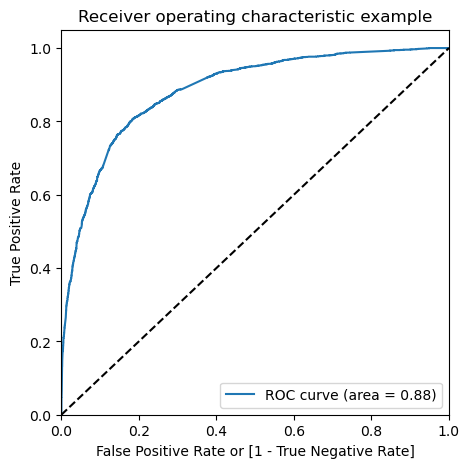

In [185]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [186]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.885492,1,1,1,1,1,1,1,1,1,1,0
1,0,0.033464,0,1,0,0,0,0,0,0,0,0,0
2,1,0.211770,0,1,1,1,0,0,0,0,0,0,0
3,0,0.171256,0,1,1,0,0,0,0,0,0,0,0
4,1,0.545298,1,1,1,1,1,1,1,0,0,0,0


In [187]:
y_train_pred_final.head(20)

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.885492,1,1,1,1,1,1,1,1,1,1,0
1,0,0.033464,0,1,0,0,0,0,0,0,0,0,0
2,1,0.211770,0,1,1,1,0,0,0,0,0,0,0
3,0,0.171256,0,1,1,0,0,0,0,0,0,0,0
4,1,0.545298,1,1,1,1,1,1,1,0,0,0,0
5,0,0.584672,1,1,1,1,1,1,1,0,0,0,0
6,0,0.378097,0,1,1,1,1,0,0,0,0,0,0
7,0,0.108908,0,1,1,0,0,0,0,0,0,0,0
8,0,0.027781,0,1,0,0,0,0,0,0,0,0,0
9,0,0.416954,0,1,1,1,1,1,0,0,0,0,0


In [188]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.374569  1.000000  0.000000
0.1   0.1  0.612619  0.971313  0.397797
0.2   0.2  0.729302  0.924237  0.612555
0.3   0.3  0.796115  0.833027  0.774009
0.4   0.4  0.818295  0.771975  0.846035
0.5   0.5  0.812922  0.665686  0.901101
0.6   0.6  0.802177  0.593968  0.926872
0.7   0.7  0.785232  0.513056  0.948238
0.8   0.8  0.758369  0.402354  0.971586
0.9   0.9  0.723791  0.282825  0.987885


<Figure size 1000x500 with 0 Axes>

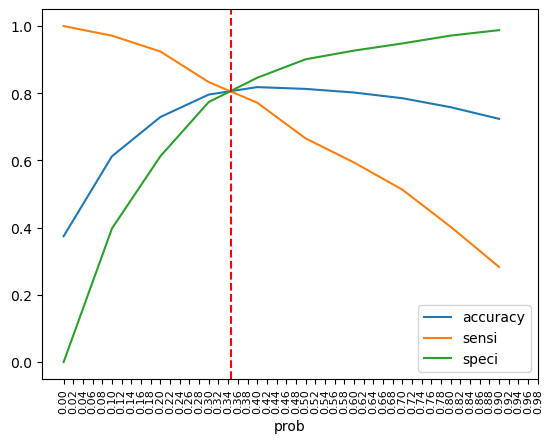

In [189]:
# Plotting accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.axvline(x=0.345, color='r', linestyle='--')                               ### additing axline
plt.xticks(rotation = 90)
plt.show()

We can see that the optimal point to take as a cutoff probability is at 0.345

In [190]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.345 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.885492,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.033464,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.211770,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.171256,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.545298,1,1,1,1,1,1,1,0,0,0,0,1


## Assigning Lead Score 

In [191]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.885492,1,1,1,1,1,1,1,1,1,1,0,1,89
1,0,0.033464,0,1,0,0,0,0,0,0,0,0,0,0,3
2,1,0.211770,0,1,1,1,0,0,0,0,0,0,0,0,21
3,0,0.171256,0,1,1,0,0,0,0,0,0,0,0,0,17
4,1,0.545298,1,1,1,1,1,1,1,0,0,0,0,1,55


The Lead Score has been assigned according to their converted probability.

#### Checking the overall accuracy, sensitivity, specificity and other metrics

In [192]:
#Checking the accuracy
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
trainaccuracy

0.8112687698030032

Accuracy of the Model is 0.81

In [193]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3690,  850],
       [ 520, 2199]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Checking sensitivity of the model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.8087532180948879

Sensitivity of the Model is 0.80

In [196]:
# Checking the specificity of the model
trainspecificity= TN / float(TN+FP)
trainspecificity

0.8127753303964758

Specificity of the Model is 0.81

In [197]:
# Calculating false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.18722466960352424


False Positive Rate is 0.18

In [198]:
# Calculating Positive predictive value 
print (TP / float(TP+FP))

0.7212200721548049


Positive predictive value for the model is 0.72

In [199]:
# Calculating Negative predictive value
print(TN / float(TN+ FN))

0.8764845605700713


Negative predictive value for the model is 0.87

## Precision and Recall

In [200]:
from sklearn.metrics import precision_score, recall_score

In [201]:
#Calulating Precision
precision= precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.8012394864984507

In [202]:
#Calulating Recall
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.6656859139389482

In [203]:
trainF1_score= 2 * (precision * recall) / (precision + recall)
trainF1_score

0.7271996785857775

## Precision and Recall Tradeoff 

In [204]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

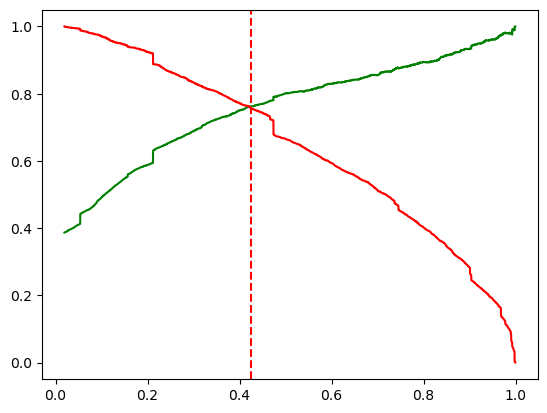

In [205]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.424, color='r', linestyle='--') 
plt.show()

#### Making predictions on the test set 

In [206]:
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3535,0,0,0.303810,0.993976,-0.140806,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
705,0,0,-0.418785,-0.824383,-0.140806,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6815,0,0,-1.141380,-0.883218,-1.261866,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1940,0,0,-0.418785,-0.017245,-0.140806,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7204,0,0,0.665108,2.455649,1.540782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [207]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Student,What is your current occupation_Working Professional
7136,0,0.303810,1.166803,-0.516361,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3711,0,0.303810,1.137385,-0.140806,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1216,0,-1.141380,-0.883218,-1.261866,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
6517,0,-0.057487,-0.875863,-0.421071,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4837,0,-0.057487,1.893043,0.419723,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [208]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [209]:
y_test_pred = res.predict(X_test_sm)

In [210]:
y_test_pred.head(10)

7136    0.885839
3711    0.522473
1216    0.473686
6517    0.281757
4837    0.835908
6287    0.244138
170     0.800043
662     0.900945
7776    0.887885
490     0.186574
dtype: float64

In [211]:
# Converting y_pred to a dataframe 
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head(10)

,0
7136,0.885839
3711,0.522473
1216,0.473686
6517,0.281757
4837,0.835908
6287,0.244138
170,0.800043
662,0.900945
7776,0.887885
490,0.186574


In [212]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [213]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [214]:
y_pred_final.head()

,Converted,0
7136,1,0.885839
3711,1,0.522473
1216,0,0.473686
6517,0,0.281757
4837,1,0.835908


In [215]:
#Renaming the column for better understanding
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [216]:
# Checking the head of y_pred_final
y_pred_final.head()

,Converted,Converted_prob
7136,1,0.885839
3711,1,0.522473
1216,0,0.473686
6517,0,0.281757
4837,1,0.835908


In [217]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.345 else 0)

In [218]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [219]:
Lead_Score=y_pred_final.copy()
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
7136,1,0.885839,1,89
3711,1,0.522473,1,52
1216,0,0.473686,1,47
6517,0,0.281757,0,28
4837,1,0.835908,1,84


In [220]:
Lead_Score.reset_index(level=0, inplace=True)
Lead_Score.drop(['Converted', 'Converted_prob', 'final_predicted'], 1, inplace = True)
Lead_Score.head()

,index,Lead_Score
0,7136,89
1,3711,52
2,1216,47
3,6517,28
4,4837,84


In [221]:
df=df_dup.copy()
df.reset_index(level=0, inplace=True)
df.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index',
       'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], 1, inplace = True)
df.head()

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [222]:
Lead_Score=pd.merge(df,Lead_Score,on='index')
Lead_Score.drop(['index'], 1, inplace = True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
0,3256f628-e534-4826-9d63-4a8b88782852,660681,20
1,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,72
2,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,10
3,af465dfc-7204-4130-9e05-33231863c4b5,660616,20
4,ecd117ca-375f-49ea-afd6-b52b84d00c69,660458,82


#### As per the requirement we have assigned a lead score to all the prospects and this will help target potential leads.A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted 

In [223]:
Lead_Score.sort_values(["Lead_Score"], ascending = False,inplace=True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
1098,69f3ab40-b1aa-42ff-afb5-b69a9062a98c,607109,100
1123,2dda3090-e7a8-40dc-8817-8dd9a46c0e67,606306,100
577,fd6314e6-6e96-4888-8a5b-b3941ab6bf61,631406,100
929,223cd909-e4d7-4ede-bf39-f3f624286ab2,614107,100
930,eec1c494-6329-4b35-ab26-9fef63bf2b12,614100,100


In [224]:
# Let's check the overall accuracy.
testaccuracy= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
testaccuracy

0.8049586776859504

In [225]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[887, 212],
       [142, 574]], dtype=int64)

In [226]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [227]:
# Checking the sensitivity of the lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.8016759776536313

Sensitivity of our model is 0.80

In [228]:
# Calculating the specificity of the model
testspecificity= TN / float(TN+FP)
testspecificity

0.8070973612374887

Specificity of our model is 0.80

In [229]:
#Checking Precision
precision= precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
precision

0.7302798982188295

Precision for the model is 0.73

In [230]:
#Checking recall
recall=recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
recall

0.8016759776536313

Recall for our model is 0.80

In [231]:
# calculating the F1 Score
testF1_score= 2 * (precision * recall) / (precision + recall)
testF1_score

0.7643142476697737

## Final Observation 

With insights from data, Team able to design a model to share lead Score , which will help sales team to target hot leads & convert them into Customers. 

In [232]:
Lead_Score

,Prospect ID,Lead Number,Lead_Score
1098,69f3ab40-b1aa-42ff-afb5-b69a9062a98c,607109,100
1123,2dda3090-e7a8-40dc-8817-8dd9a46c0e67,606306,100
577,fd6314e6-6e96-4888-8a5b-b3941ab6bf61,631406,100
929,223cd909-e4d7-4ede-bf39-f3f624286ab2,614107,100
930,eec1c494-6329-4b35-ab26-9fef63bf2b12,614100,100
...,...,...,...
1775,5398e7ff-74db-4074-89fb-4fd9a603f521,581171,1
550,09a5ed95-bda7-4c61-aa80-2ba4e6b8781e,632407,1
1032,51efc8f5-9b9d-4a03-b5f0-52ba868b76cf,609169,1
1080,fd887094-23c6-4703-9e30-35f8210e1146,607630,1


## Model Evaluation Metrics

In [233]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :81.13 %
Train Data Sensitivity :80.88 %
Train Data Specificity :81.28 %
Train Data F1 Score    :0.73  
Test Data Accuracy     :80.5 %
Test Data Sensitivity  :80.17 %
Test Data Specificity  :80.71 %
Test Data F1 Score     :0.76  


In [234]:
from sklearn.metrics import classification_report

In [235]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4540
           1       0.72      0.81      0.76      2719

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259



In [236]:
print (classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1099
           1       0.73      0.80      0.76       716

    accuracy                           0.80      1815
   macro avg       0.80      0.80      0.80      1815
weighted avg       0.81      0.80      0.81      1815



#### Finding out the Important Features from our final model:

In [237]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.815522
Lead Source_Reference                                   3.425277
Last Activity_Other_Activity                            3.021578
What is your current occupation_Working Professional    2.701710
Last Activity_SMS Sent                                  2.112268
Last Activity_Unsubscribed                              1.698920
Total Time Spent on Website                             1.094187
Lead Source_Olark Chat                                  1.081902
Last Activity_Unreachable                               1.000167
Last Activity_Email Opened                              0.903333
What is your current occupation_Student                 0.550782
Last Activity_Email Link Clicked                        0.536714
TotalVisits                                             0.353181
Page Views Per Visit                                   -0.341913
Specialization_Hospitality Management                  -0.615087
Last Activity_Olark Chat 

## Recommendation 

. The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

. The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

. The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

. The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

. The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

.The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%. 